# 🫁 LUNG AI: PREDICTIVE MODEL TO IDENTIFY HIGH-RISK LUNG CANCER PATIENTS

Objective: Develop a predictive model with machine learning for the early detection of lung cancer.

The most frequently diagnosed tumor in the world in 2022 was lung cancer with 2.5M new cases.
The highest number of cancer deaths worldwide also corresponds to lung cancer: estimated at 1.8M
Lung cancer is the main cause of cancer death in Spain, according to data from the Cancer Observatory of the Spanish Association Against Cancer.

More than 70% are in an advanced stage of the disease at the time of diagnosis. And this is where my project comes in: a predictive model that helps identify high-risk patients more efficiently and with high precision, improving the speed, cost and accessibility of diagnosis.

In [2]:
# 📚 Basic Libraries
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings

%matplotlib inline 
pd.set_option('display.max_columns', None)

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

# EDA
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy import stats as st

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

# 🤖 Scalation
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
# 🔧 Basic functions
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

# Data Extraction

In [6]:
data = pd.read_excel("/Users/sarasalmon/Desktop/IRONHACK/Data_Analytics/Semana_6/project/dataset/Cancer_prediction_dataset.xlsx")

In [7]:
data

,ID,Gender,Age,Marital Status,Children,Smoker,Employed,Years Worked,Income Level,Social Media,Online Gaming,Cancer
0,25137,Male,23,Married,3,No,No,0,Low,Yes,No,Yes
1,13063,Male,55,Single,4,Yes,No,0,Low,No,No,Yes
2,61685,Female,43,Single,3,No,Yes,25,Low,Yes,Yes,Yes
3,49303,Female,24,Married,0,Yes,Yes,15,High,Yes,Yes,No
4,84442,Female,54,Widowed,5,Yes,No,0,Low,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
995,25043,Male,54,Single,5,Yes,Yes,8,Low,No,No,Yes
996,87442,Male,75,Separated,2,No,Yes,10,Low,No,No,Yes
997,50818,Male,40,Separated,0,Yes,Yes,29,Low,No,Yes,Yes
998,14160,Female,87,Separated,1,No,Yes,38,High,No,No,Yes


In [8]:
open_data(data)

Data shape is (1000, 12).

ID                 int64
Gender            object
Age                int64
Marital Status    object
Children           int64
Smoker            object
Employed          object
Years Worked       int64
Income Level      object
Social Media      object
Online Gaming     object
Cancer            object
dtype: object

Data row sample and full columns:


,ID,Gender,Age,Marital Status,Children,Smoker,Employed,Years Worked,Income Level,Social Media,Online Gaming,Cancer
845,40057,Male,69,Separated,2,No,No,0,Low,No,No,No
303,89153,Female,84,Single,5,Yes,Yes,14,Low,No,No,Yes
707,40149,Female,53,Separated,5,No,Yes,24,Low,Yes,No,Yes
746,22280,Female,29,Separated,3,Yes,No,0,Low,No,No,Yes
118,22898,Female,84,Widowed,1,No,No,0,Low,Yes,Yes,No


## Documentation:

#### Dataset for Lung Cancer Prediction Survey

This dataset represents a synthetic collection of responses gathered from a university-conducted survey, aimed at studying the *potential risk factors for lung cancer*. The survey includes a variety of demographic, lifestyle, and health-related questions. 

The dataset consists of the following columns, each representing a different aspect of the respondents' profiles and responses:

-ID: A unique 5-digit identifier assigned to each respondent. These are randomly generated and hold no real-world significance.

-Gender: The gender of the respondent, indicated as either 'Female' or 'Male'.

-Age: The age of the respondent, ranging from 18 to 90 years.

-Marital Status: Marital status of the respondent, categorized as 'Married', 'Single', 'Widowed', or 'Separated'.

-Children: The number of children the respondent has, ranging from 0 to 5.

-Smoker: Indicates whether the respondent smokes, with options 'Yes' or 'No'.

-Employed: Employment status of the respondent, indicated as 'Yes' for employed and 'No' for unemployed.

-Years Worked: The total number of years the respondent has been employed, ranging from 0 to 40 years. This value is set to 0 for those not employed.

-Income Level: The self-assessed income level of the respondent, categorized as 'High', 'Medium', or 'Low'. Unemployed respondents automatically fall under the 'Low' category.

-Social Media: Indicates whether the respondent uses social media platforms, with options 'Yes' or 'No'.

-Online Gaming: Denotes whether the respondent engages in online gaming, with options 'Yes' or 'No'.

-Cancer: Indicates whether the respondent has been diagnosed with lung cancer, with options 'Yes' or 'No'. This field is artificially manipulated based on a combination of factors such as age, smoking status, employment duration, and lifestyle choices to simulate potential risk factors for lung cancer.

## Columns standardization

In [12]:
snake_columns(data)

In [13]:
data.head(2)

,id,gender,age,marital_status,children,smoker,employed,years_worked,income_level,social_media,online_gaming,cancer
0,25137,Male,23,Married,3,No,No,0,Low,Yes,No,Yes
1,13063,Male,55,Single,4,Yes,No,0,Low,No,No,Yes


## Copy as best practices

In [15]:
df = data.copy()

# Data Cleaning 

## Dealing with Data types

In [18]:
df.dtypes

id                 int64
gender            object
age                int64
marital_status    object
children           int64
smoker            object
employed          object
years_worked       int64
income_level      object
social_media      object
online_gaming     object
cancer            object
dtype: object

- The variables id, age, children and years worked are numeric.
- The rest of the variables (gender, marital_status, smoker, employed, income_level, social_media, online_gaming and cancer) are objects.
- Object variables will be encoded, either by making them boolean or by using .get_dummies()

## Dealing with Duplicates, Nan and Empty Spaces

In [21]:
explore_data(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
id,0,0
gender,0,0
age,0,0
marital_status,0,0
children,0,0
smoker,0,0
employed,0,0
years_worked,0,0
income_level,0,0
social_media,0,0


In [22]:
df.shape

(1000, 12)

We dont have any Nans or Empty spaces. So now that we do have our dataframe clean, we can proceed with EDA.

# EDA

## Checking unique values

In [26]:
df.nunique().sort_values(ascending=False)

id                996
age                72
years_worked       40
children            6
marital_status      4
income_level        3
gender              2
smoker              2
employed            2
social_media        2
online_gaming       2
cancer              2
dtype: int64

- The variable id does not give us relevant information for our lung cancer prediction project with Machine Learning, so we will eliminate it.
- The variables age, years_worked and children are the numerical variables that we will introduce untreated in our model.
- As for the object variables, gender, smoker, employed social_media, online_gaming can be coded as booleans.
- Marital status and income level have 3 and 4 unique values ​​respectively, so they will be coded as get_dummies.

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,54077.278,25841.839872,10149.0,31579.25,53310.0,76806.5,99976.0
age,1000.0,54.166,20.749433,18.0,36.75,54.0,72.0,89.0
children,1000.0,2.526,1.648649,0.0,1.00,3.0,4.0,5.0
years_worked,1000.0,10.270,13.066822,0.0,0.00,1.0,21.0,39.0


From the Exploratory Data Analysis we can draw several conclusions:
- Age:The average age of patients with lung cancer is 54 years, with a minimum age of 18 years and a maximum of 89.
- Children: The average number of children of patients with lung cancer is 2, with a minimum of 0 children and a maximum of 5.
- Years worked: The average number of years worked is 10, with a minimum of 0 and a maximum of 39 years.

Our target is the 'cancer' column, so we will explore it in depth:

In [31]:
df.cancer.value_counts()

cancer
Yes    776
No     224
Name: count, dtype: int64

In [32]:
yes_percentage = 776 / len(df.cancer)
yes_percentage

0.776

<Axes: xlabel='cancer', ylabel='count'>

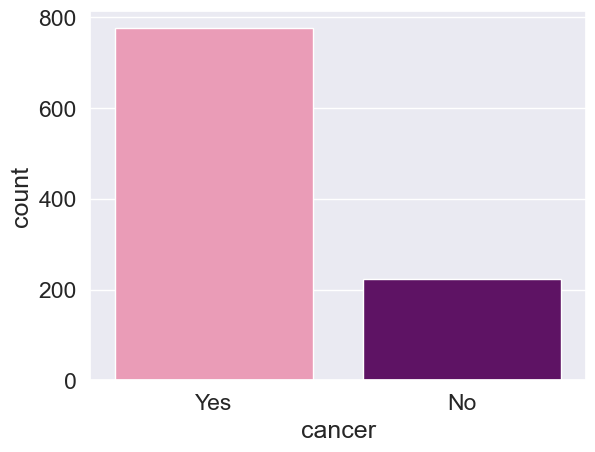

In [548]:
sns.countplot(data=df, x="cancer", palette=colores)

We can see that the data is very unbalanced; almost 80% of the data are positive for lung cancer. This imbalance will have to be managed later, by downsampling or by upsampling. 

Now, let's analyze of two variables in order to understand the relationships and patterns between these variables. Depending on the types of variables being analyzed, various techniques and visualizations can be employed.

## Univariate Analysis

Univariate analysis, as its name suggests, concentrates on one variable at a time, giving us a deep understanding of its characteristics. This fundamental step in Exploratory Data Analysis (EDA) lays the groundwork for subsequent analyses involving multiple variables. Let's explore various techniques for both categorical and numerical variables. In this case, as our target is categorical, we will focus on:

- Frequency tables. Counts and proportions.
- Visualizations: Bar charts, pie charts

In [37]:
df.cancer.nunique()

2

In [38]:
# Absolute frequency
frequency_table = df.cancer.value_counts()
frequency_table

cancer
Yes    776
No     224
Name: count, dtype: int64

In [39]:
# Relative frequency
proportion_table = df.cancer.value_counts(normalize=True)
proportion_table

cancer
Yes    0.776
No     0.224
Name: proportion, dtype: float64

In [40]:
df_frequencies = pd.concat([frequency_table, proportion_table], axis=1)
df_frequencies.columns = ['absolute_frequency', 'relative_frequency']
df_frequencies

,absolute_frequency,relative_frequency
cancer,,
Yes,776,0.776
No,224,0.224


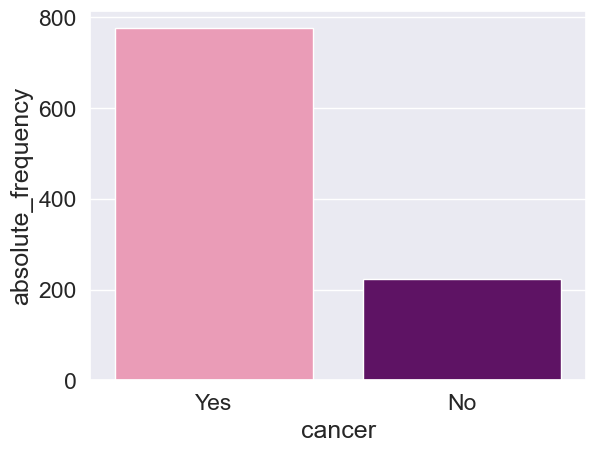

In [542]:
sns.barplot(
    x='cancer',
    y='absolute_frequency',
    data=df_frequencies,
    palette=colores,
)
plt.show()

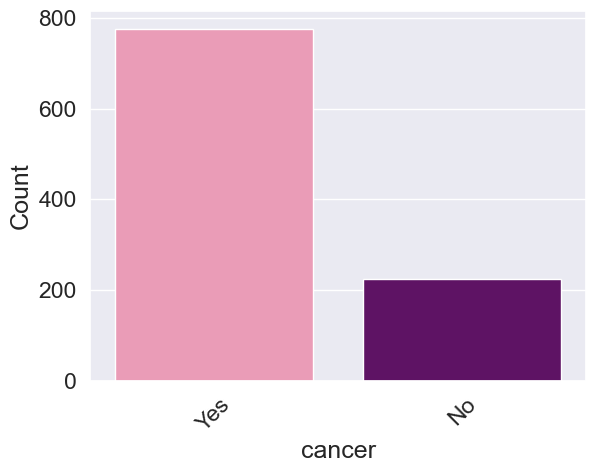

In [544]:
sns.countplot(
    x='cancer',
    data=df,                      
    palette=colores,
)
plt.ylabel('Count') 
plt.xticks(rotation=45)  
plt.show()

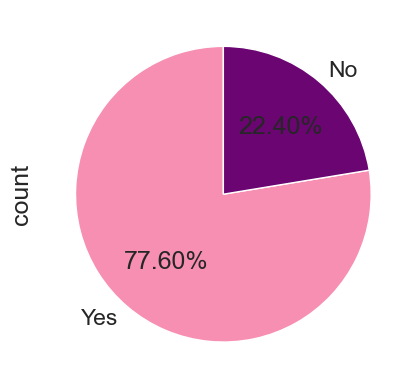

In [546]:
frequency_table.plot.pie(autopct='%1.2f%%' ,startangle=90, colors=colores)
plt.show()

## Bivariate Analysis

Understand the relationship between the target - cancer - with the rest of the variables.

## Cancer (Categorical) VS Categorical Variables:

### Crosstab

We'll begin by creating a crosstab between 'cancer' and the categorical variables - 'gender','marital_status', 'smoker', 'employed', 'income_level', 'social_media' and 'online_gaming' -  to observe the interaction between these categorical variables.

# Cancer VS Gender

In [47]:
cancer_gender_crosstab = pd.crosstab(index=df['cancer'],columns=df['gender'])
cancer_gender_crosstab

gender,Female,Male
cancer,,
No,119,105
Yes,396,380


Based on these data, there is no significant difference in the number of positive cases of lung cancer based on gender, since we obtain similar figures for men and women.

To analyze relationships between categorical variables we'll use statistical tests such as the chi-square (χ²) test and Cramer's V and using visualization tools such as stacked or grouped bar charts.

The chi-square test is a statistical test used to **determine whether there is a significant association between two categorical variables**. 

Interpretation:
- **p-value < 0.05: significant association between the categorical variables.**
- **p-value >= 0.05: not enough evidence to conclude a significant association between the variables.**

Let's plot the crosstab and perform a Chi-square test for `cancer` and `gender` to determine if they are independent.

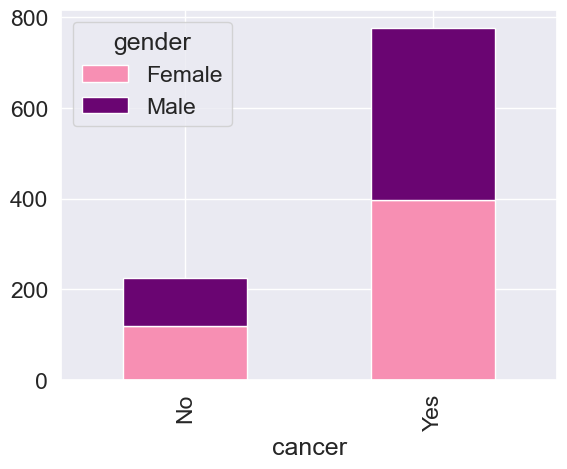

In [576]:
cancer_gender_crosstab.plot(kind='bar', stacked=True, color=colores)
plt.show()

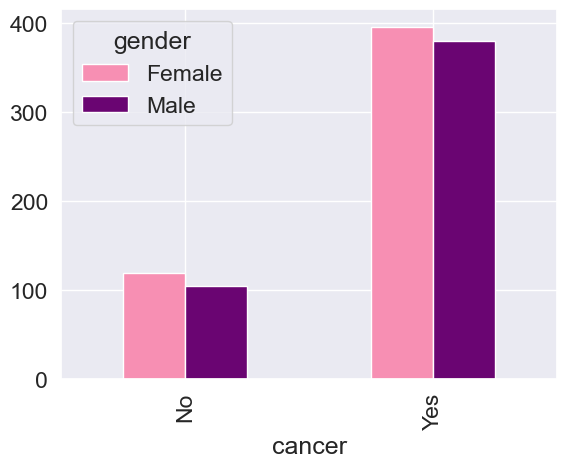

In [578]:
cancer_gender_crosstab.plot(kind='bar', color=colores)
plt.show()

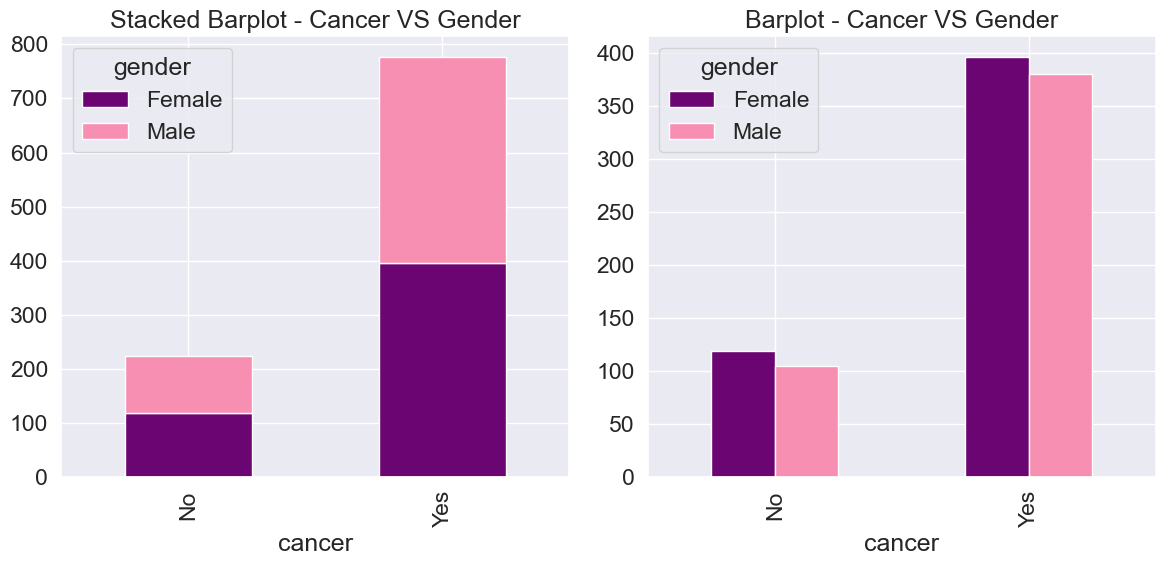

In [584]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta el tamaño según necesites

cancer_gender_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=["#6A0572","#F78FB3"])
axes[0].set_title('Stacked Barplot - Cancer VS Gender')

cancer_gender_crosstab.plot(kind='bar', ax=axes[1], color=["#6A0572","#F78FB3"])
axes[1].set_title('Barplot - Cancer VS Gender')

plt.tight_layout()
plt.show()

#### Seaborn visualizations and Hue

There are a couple of Seaborn visualizations that allow us to add a categorical variable in the parameter hue. By using the hue parameter, we can add another dimension of information to our plots.

### Frequency heat maps

Displays frequencies using color gradients for combinations of two categorical variables.

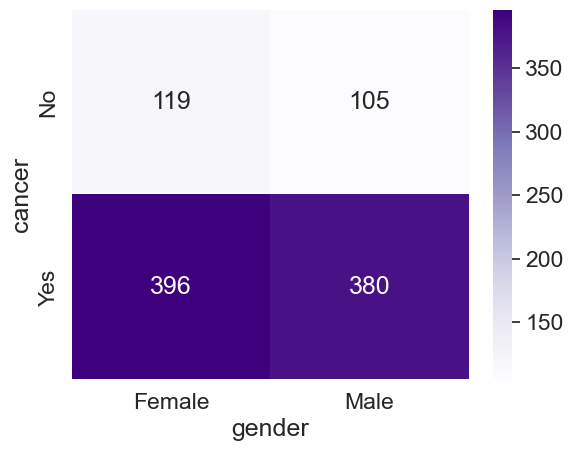

In [574]:
sns.heatmap(cancer_gender_crosstab, annot=True, cmap="Purples", fmt="d")
plt.show()

Not really useful in this case.

### Chi-square tests

In [61]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cancer_gender_crosstab)
chi2_contingency(cancer_gender_crosstab)
chi2_pvalue

0.633688987443765

The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the extremely high p-value, we accept the null hypothesis. This implies that there is **not a significant association between 'cancer' and 'gender' in the dataset**.

## Cramér's V

While the Chi-square test informs us about the independence of two categorical variables, Cramér's V measures the strength of the association between them.

Cramer's V is a measure of association used to quantify the strength of the relationship between categorical variables.

Interpretation: Cramer's V ranges from 0 to 1:
- 0 : no association
- 1 : perfect association between the variables.

A higher value of Cramer's V indicates a stronger relationship between the categorical variables.

Let's compute Cramér's V for 'cancer' and 'gender' to measure the strength of their association.

In [65]:
association(cancer_gender_crosstab, method='cramer')

0.017469160300997703

The Cramer value of 0.017 suggests no association between two variables.

Let's do this for the others variables:
- Cancer VS Marital Status
- Cancer VS Smoker
- Cancer VS Employed
- Cancer VS Income Level
- Cancer VS Social Media
- Cancer VS Online Gaming

# Cancer VS Marital Status

In [69]:
cancer_marital_crosstab = pd.crosstab(index=df['cancer'],columns=df['marital_status'])
cancer_marital_crosstab

marital_status,Married,Separated,Single,Widowed
cancer,,,,
No,66,58,39,61
Yes,166,201,228,181


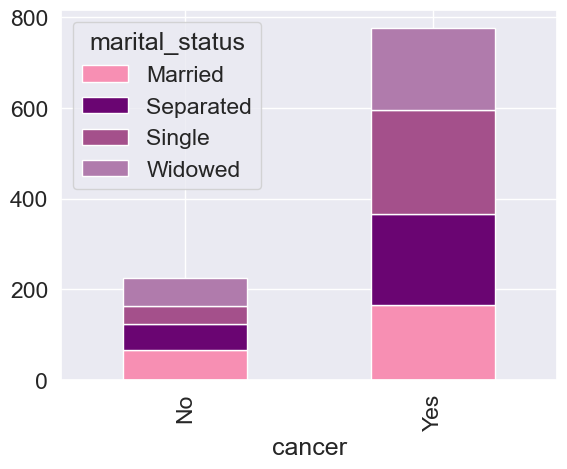

In [566]:
cancer_marital_crosstab.plot(kind='bar', stacked=True, color=colores)
plt.show()

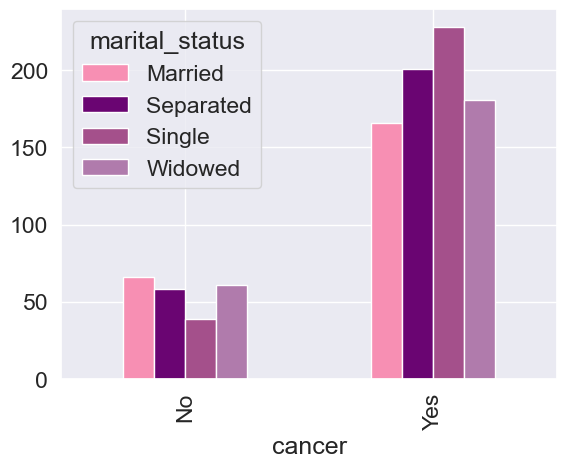

In [564]:
cancer_marital_crosstab.plot(kind='bar', color=colores)
plt.show()

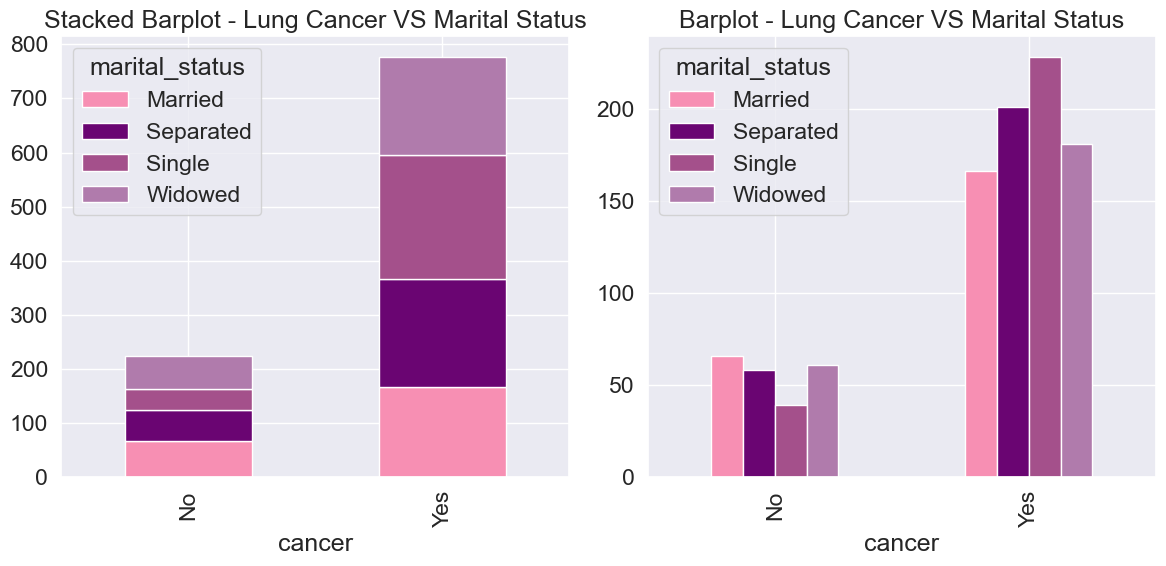

In [560]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta el tamaño según necesites

cancer_marital_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=colores)
axes[0].set_title('Stacked Barplot - Lung Cancer VS Marital Status')

cancer_marital_crosstab.plot(kind='bar', ax=axes[1], color=colores)
axes[1].set_title('Barplot - Lung Cancer VS Marital Status')

plt.tight_layout()
plt.show()

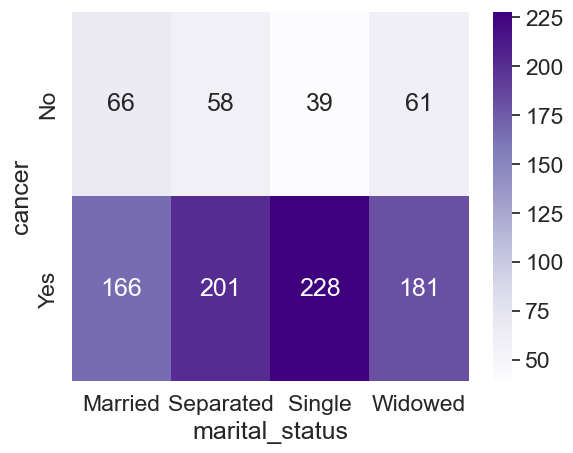

In [558]:
sns.heatmap(cancer_marital_crosstab, annot=True, cmap="Purples", fmt="d")
plt.show()

In [74]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cancer_marital_crosstab)
chi2_contingency(cancer_marital_crosstab)
chi2_pvalue

0.001571305814600721

As we began to see in the heatmap, there is a relationship between 'cancer' and 'marital_status'. 

As we can see Chi2 < 0.05, so that we can establish that there is a **significant relationship between Cancer' and Marital Status'**; with a higher incidence of positive cases of lung cancer for single patients, followed by those who are divorced.

In order to see how strong this relationship is, we apply Cramer V's value:

In [76]:
association(cancer_marital_crosstab, method='cramer')

0.12372651479921301

The Cramer value of 0.123 suggests a **weak** association between two variables.

# Cancer VS Smoker

In [79]:
cancer_smoker_crosstab = pd.crosstab(index=df['cancer'],columns=df['smoker'])
cancer_smoker_crosstab

smoker,No,Yes
cancer,,
No,150,74
Yes,338,438


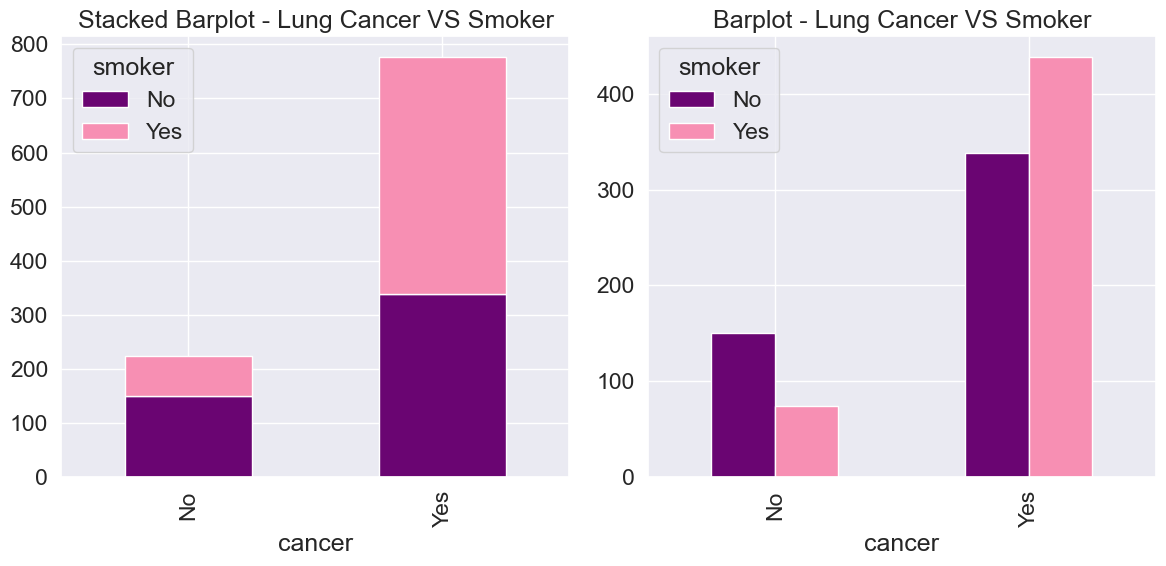

In [582]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta el tamaño según necesites

cancer_smoker_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=["#6A0572","#F78FB3"])
axes[0].set_title('Stacked Barplot - Lung Cancer VS Smoker')

cancer_smoker_crosstab.plot(kind='bar', ax=axes[1], color=["#6A0572","#F78FB3"])
axes[1].set_title('Barplot - Lung Cancer VS Smoker')

plt.tight_layout()
plt.show()

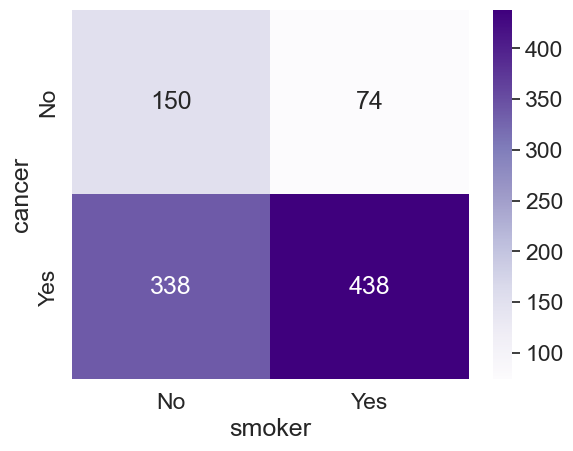

In [556]:
sns.heatmap(cancer_smoker_crosstab, annot=True, cmap="Purples", fmt="d")
plt.show()

In [82]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cancer_smoker_crosstab)
chi2_contingency(cancer_smoker_crosstab)
chi2_pvalue

1.0731689229375813e-09

As we began to see in the heatmap, there is a relationship between 'cancer' and 'smoker'.

As we can see Chi2 is really low, so that we can establish that there is a significant relationship between Cancer and Smoker; with a higher incidence of positive cases of lung cancer for smoker patients.

In order to see how strong this relationship is, we apply Cramer V's value:

In [84]:
association(cancer_smoker_crosstab, method='cramer')

0.19523900313827192

The Cramer value of 0.19 suggests a weak association between two variables.

# Cancer VS Employed

In [87]:
cancer_employed_crosstab = pd.crosstab(index=df['cancer'],columns=df['employed'])
cancer_employed_crosstab

employed,No,Yes
cancer,,
No,140,84
Yes,346,430


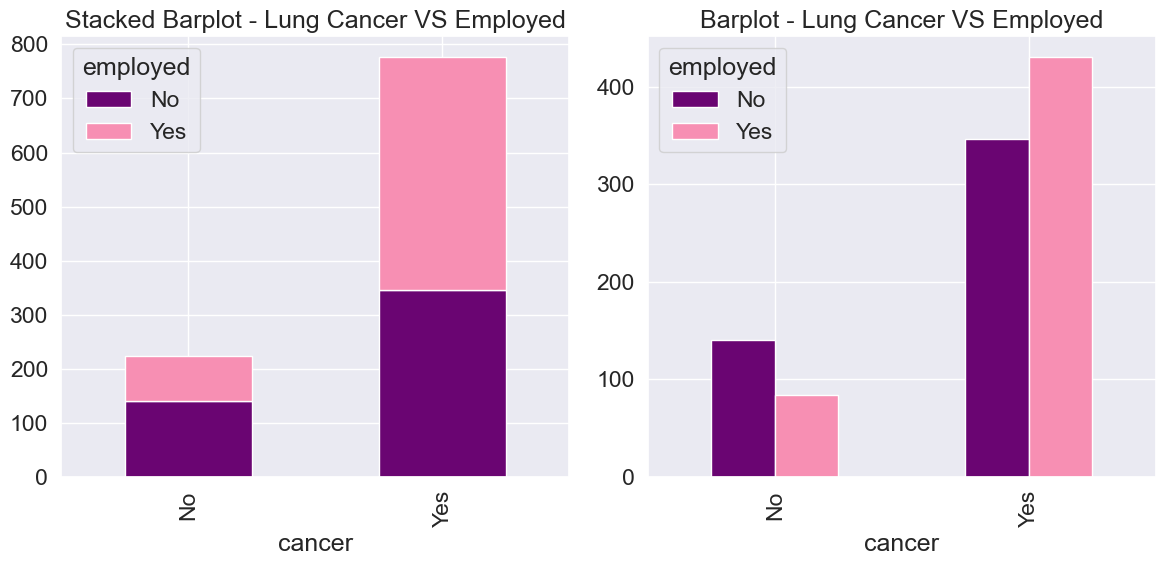

In [552]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta el tamaño según necesites

cancer_employed_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=["#6A0572","#F78FB3"])
axes[0].set_title('Stacked Barplot - Lung Cancer VS Employed')

cancer_employed_crosstab.plot(kind='bar', ax=axes[1], color=["#6A0572","#F78FB3"])
axes[1].set_title('Barplot - Lung Cancer VS Employed')

plt.tight_layout()
plt.show()

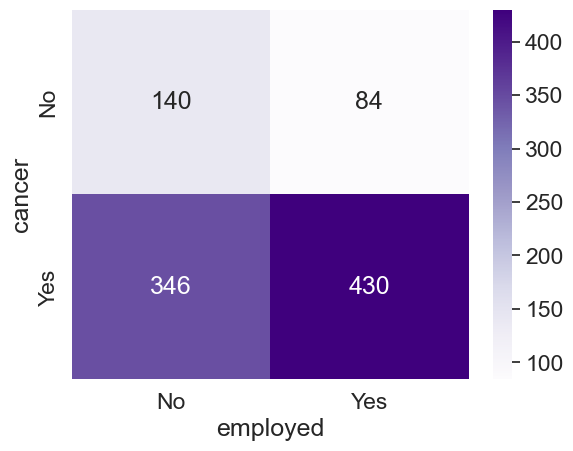

In [550]:
sns.heatmap(cancer_employed_crosstab, annot=True, cmap="Purples", fmt="d")
plt.show()

In [90]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cancer_employed_crosstab)
chi2_contingency(cancer_employed_crosstab)
chi2_pvalue

3.332376383557169e-06

As we began to see in the heatmap, there is a relationship between 'cancer' and 'employed'.

As we can see Chi2 is really low, so that we can establish that there is a significant relationship between Cancer and Employed; with a higher incidence of positive cases of lung cancer for employed patients.

In order to see how strong this relationship is, we apply Cramer V's value:

In [92]:
association(cancer_employed_crosstab, method='cramer')

0.149419835746159

The Cramer value of 0.14 suggests a weak association between two variables.

# Cancer VS Income Level

In [95]:
cancer_income_crosstab = pd.crosstab(index=df['cancer'],columns=df['income_level'])
cancer_income_crosstab

income_level,High,Low,Medium
cancer,,,
No,32,160,32
Yes,134,509,133


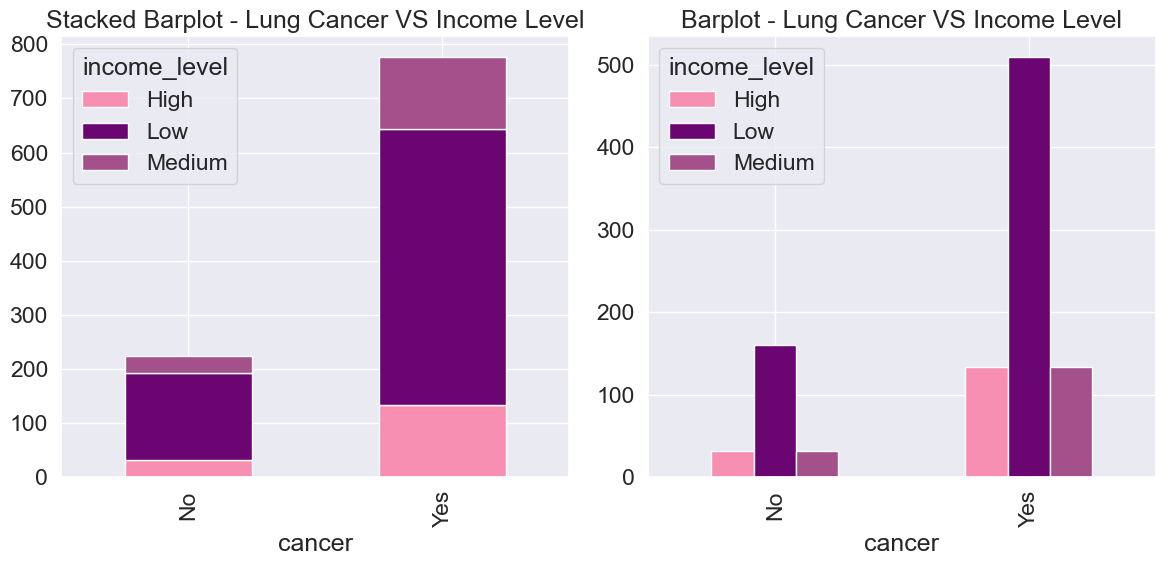

In [538]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta el tamaño según necesites

cancer_income_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=colores)
axes[0].set_title('Stacked Barplot - Lung Cancer VS Income Level')

cancer_income_crosstab.plot(kind='bar', ax=axes[1], color=colores)
axes[1].set_title('Barplot - Lung Cancer VS Income Level')

plt.tight_layout()
plt.show()

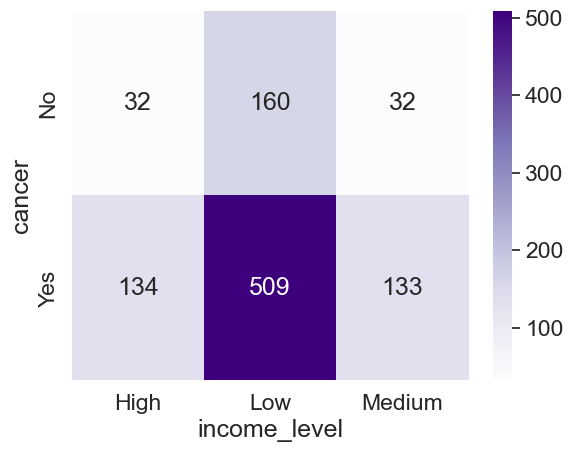

In [532]:
sns.heatmap(cancer_income_crosstab, annot=True, cmap="Purples", fmt="d")
plt.show()

In [98]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cancer_income_crosstab)
chi2_contingency(cancer_income_crosstab)
chi2_pvalue

0.26263337607981657

In [99]:
association(cancer_income_crosstab, method='cramer')

0.051710660924756006

This Chi2 and Cramer's value might suggest that there is no significant relationship between the variables 'cancer' and 'income level'. However, if we look at both the bar graphs and the heatmap, we can see that there is a clear relationship between patients with lung cancer and low income level. This may occur because the results are very unbalanced, and the Chi2 and Cramer's values ​​are distorted. Therefore, we will filter only for "Low" in income level and repeat the analysis.

In [101]:
low_income_df = df[df['income_level'] == 'Low']
low_income_df['cancer'].value_counts(normalize=True)

cancer
Yes    0.760837
No     0.239163
Name: proportion, dtype: float64

By doing the value_counts, it can be seen that 76% of cancer patients are low-income patients, so, despite obtaining low statistical values, it can be stated that there is a relationship between the low income level and positive cases of lung cancer.

# Cancer VS Social Media

In [104]:
cancer_social_crosstab = pd.crosstab(index=df['cancer'],columns=df['social_media'])
cancer_social_crosstab

social_media,No,Yes
cancer,,
No,141,83
Yes,335,441


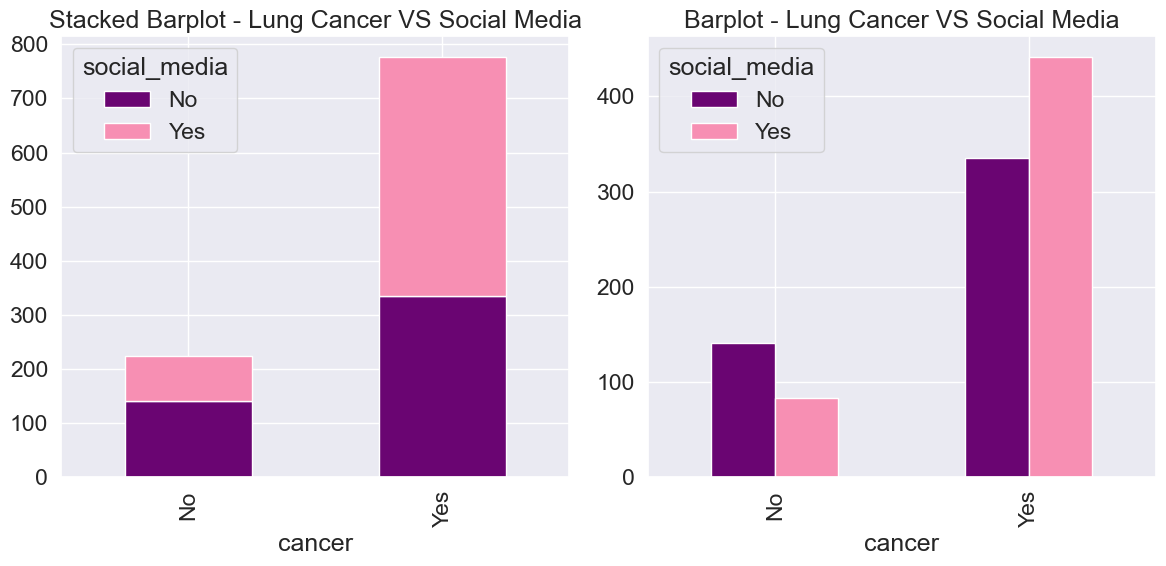

In [512]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta el tamaño según necesites

cancer_social_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=["#6A0572","#F78FB3"])
axes[0].set_title('Stacked Barplot - Lung Cancer VS Social Media')

cancer_social_crosstab.plot(kind='bar', ax=axes[1], color=["#6A0572","#F78FB3"])
axes[1].set_title('Barplot - Lung Cancer VS Social Media')

plt.tight_layout()
plt.show()

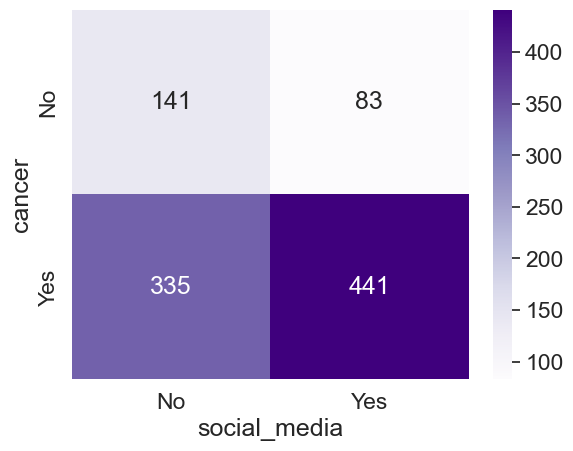

In [514]:
sns.heatmap(cancer_social_crosstab, annot=True, cmap="Purples", fmt="d")
plt.show()

In [107]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cancer_social_crosstab)
chi2_contingency(cancer_social_crosstab)
chi2_pvalue

2.678120855144985e-07

As we see in the heatmap, there is a relationship between 'cancer' and 'social_media'.

As we can see Chi2 is really low, so that we can establish that there is a significant relationship between Cancer and Social Media; with a higher incidence of positive cases of lung cancer for patients with social_media.

In order to see how strong this relationship is, we apply Cramer V's value:

In [109]:
association(cancer_social_crosstab, method='cramer')

0.16509402319356942

The Cramer value of 0.16 suggests a weak association between two variables.

# Cancer VS Online Gaming

In [112]:
cancer_gaming_crosstab = pd.crosstab(index=df['cancer'],columns=df['online_gaming'])
cancer_gaming_crosstab

online_gaming,No,Yes
cancer,,
No,74,150
Yes,434,342


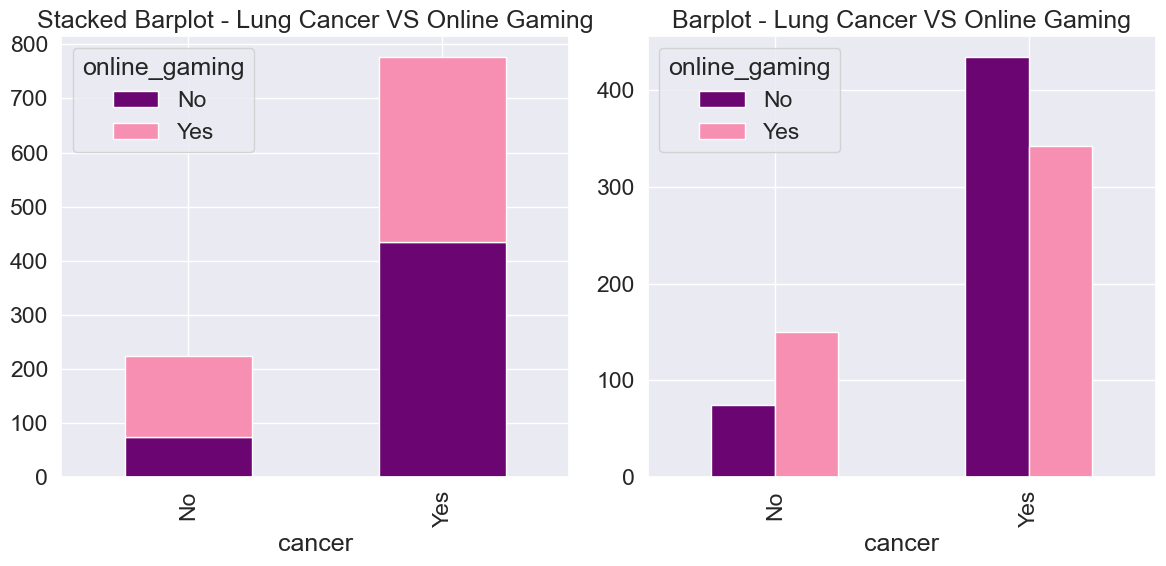

In [592]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta el tamaño según necesites

cancer_gaming_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=["#6A0572","#F78FB3"])
axes[0].set_title('Stacked Barplot - Lung Cancer VS Online Gaming')

cancer_gaming_crosstab.plot(kind='bar', ax=axes[1], color=["#6A0572","#F78FB3"])
axes[1].set_title('Barplot - Lung Cancer VS Online Gaming')

plt.tight_layout()
plt.show()

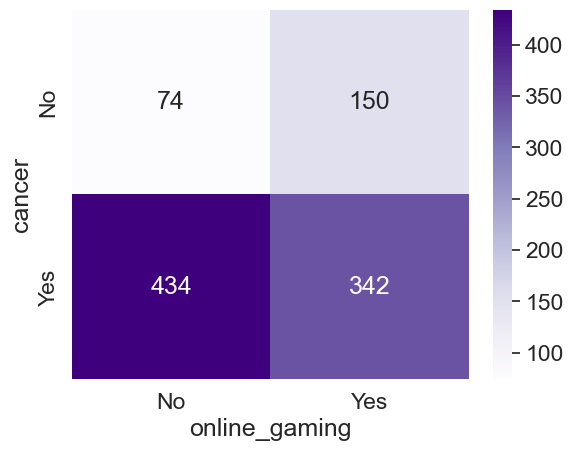

In [508]:
sns.heatmap(cancer_gaming_crosstab, annot=True, cmap="Purples", fmt="d")
plt.show()

In [115]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cancer_gaming_crosstab)
chi2_contingency(cancer_gaming_crosstab)
chi2_pvalue

2.50367761926907e-09

In [116]:
association(cancer_gaming_crosstab, method='cramer')

0.19090903861101396

In this case we can see that, according to the Chi2 and Cramer's V, there is a (low) relationship between not playing video games and having lung cancer, with a high incidence of cancer in those people who do not play online games. This can be explained because, probably, these people who do not play video games are older people. 

Next, we will see the relationship between having lung cancer and the numerical variables:
- Cancer VS Age
- Cancer VS Children
- Cancer VS Years worked

# Categorical VS Continous

To compare whether or not a person has cancer based on a numerical variable such as age, we will use the **T-Student test**; we have two groups (patients with cancer and patients without cancer) and we want to compare whether there is a significant difference in the average age between both groups.

# Cancer VS Age

## T-Student

First, we compare the average ages between people who have cancer and those who do not:

In [124]:
cancer_age_group = df[df['cancer'] == 'Yes']['age']
no_cancer_age_group = df[df['cancer'] == 'No']['age']

In [125]:
cancer_age_group.mean()

56.248711340206185

In [126]:
no_cancer_age_group.mean()

46.950892857142854

We see that the average age of people without cancer is slightly younger than those with cancer; we develop our T-Student.

- Null Hypothesis (H₀): The mean age of Cancer patients class is equal to the mean age in people with no cancer.
( H_0: mu0 = mu1 )

- Alternative Hypothesis (H₁): The mean age of Cancer patients class is higher equal to the mean age in people with no cancer.
( H_1: mu0 > mu1 )

This is a one-tailed Student t-test, in which the alternative hypothesis will be that the mean age of patients with cancer is greater than that of patients without cancer.

In [129]:
t_stat, p_value = st.ttest_ind(
    cancer_age_group, 
    no_cancer_age_group, 
    equal_var=False,  # different variance
    alternative='greater'  # alternative hypothesis: greater age of cancer patients
)


print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.20f}")
print()


alpha = 0.05


if p_value > alpha:
    print("The Null Hypothesis is not rejected: There is insufficient evidence to conclude that the age of patients with cancer is greater than that of patients without cancer.")
else:
    print("Null Hypothesis is rejected: There is sufficient evidence to conclude that the age of patients with cancer is significantly older than that of patients without cancer.")

Test Statistic (t): 6.41
P-Value: 0.00000000020680667767

Null Hypothesis is rejected: There is sufficient evidence to conclude that the age of patients with cancer is significantly older than that of patients without cancer.


Since the p-value is much lower than the significance level (0.05), we can reject the null hypothesis;the age of cancer patients is significantly older than that of non-cancer patients, based on the data analyzed.

## Data Visualization

In addition, it is useful to visualize how the ages are distributed between the two groups (with cancer and without cancer).

We will use boxplots, violin plots and bar plots to see the dispersion and median of each group.

In [490]:
colores = ['#F78FB3','#6A0572', '#A4508B', '#B07BAC', '#8E44AD']

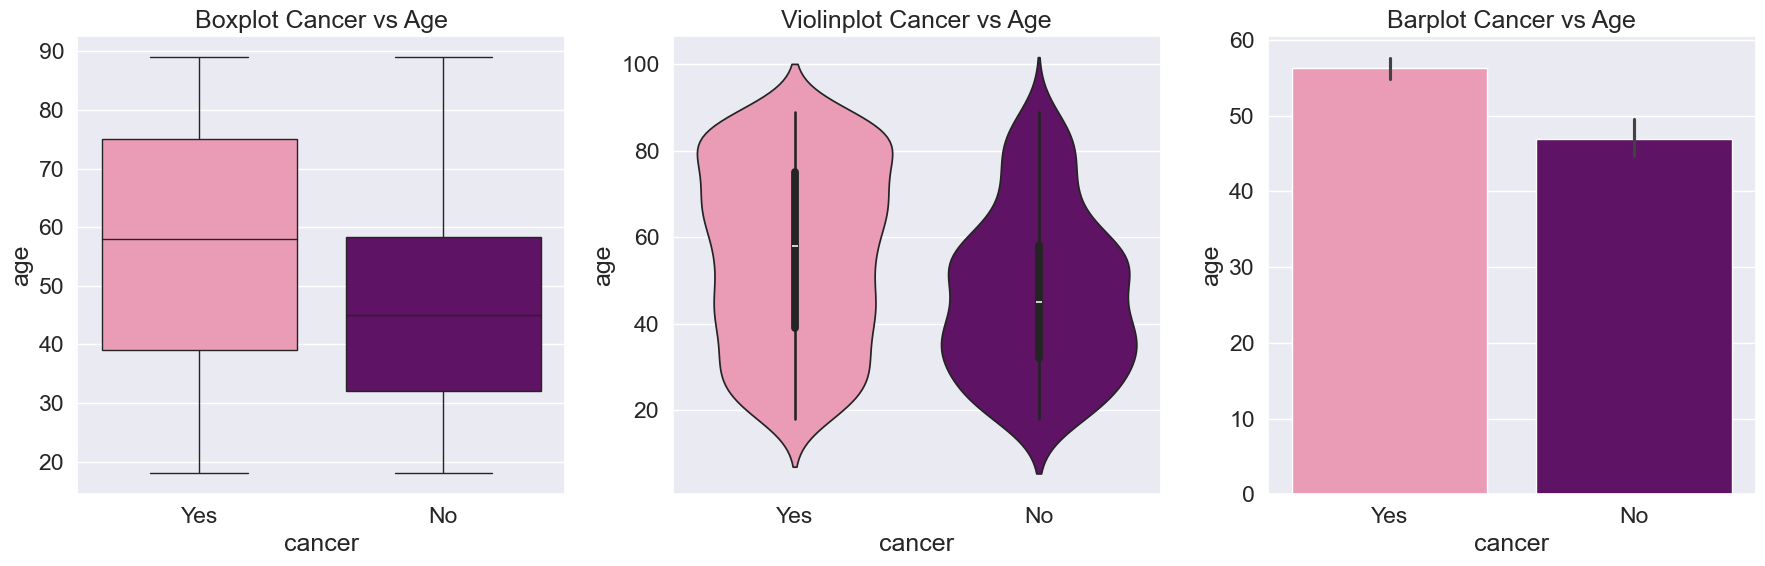

In [492]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) 
sns.boxplot(data=df, x="cancer", y="age", palette=colores)
plt.title("Boxplot Cancer vs Age")

plt.subplot(1, 3, 2)
sns.violinplot(data=df, x="cancer", y="age", palette=colores)
plt.title("Violinplot Cancer vs Age")

plt.subplot(1, 3, 3)
sns.barplot(data=df, x="cancer", y="age", palette=colores)
plt.title("Barplot Cancer vs Age")

plt.tight_layout()
plt.show()

These graphs show that the average age of cancer patients is higher. Furthermore, the violin plot shows that the age distribution in cancer patients is much denser at older ages, while for patients without cancer the highest density is found at younger ages.

# Cancer VS Children

In [136]:
cancer_children_group = df[df['cancer'] == 'Yes']['children']
no_cancer_children_group = df[df['cancer'] == 'No']['children']

First, we compare the average number of children between people who have cancer and those who do not:

In [138]:
cancer_children_group.mean()

2.6713917525773194

In [139]:
no_cancer_children_group.mean()

2.0223214285714284

We see that the average number of children of people without cancer is slightly lower than those with cancer; we develop our T-Student.

Null Hypothesis (H₀): The average of children of Cancer patients class is equal to the average of children in people with no cancer. 
( H_0: mu0 = mu1 )

Alternative Hypothesis (H₁): The average of children of Cancer patients class is higher than the average of children in people with no cancer. 
( H_1: mu0 > mu1 )

This is a one-tailed Student t-test, in which the alternative hypothesis will be that the average number of children in cancer patients is greater than that of patients without cancer.

In [142]:
t_stat, p_value = st.ttest_ind(
    cancer_children_group, 
    no_cancer_children_group, 
    equal_var=False,  # different variance
    alternative='greater'  # alternative hypothesis: higher number of children in cancer patients
)

print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.20f}")
print()

alpha = 0.05

if p_value > alpha:
    print("The Null Hypothesis is not rejected: There is no sufficient evidence to conclude that the number of children of patients with cancer is equal to that of patients without cancer.")
else:
    print("Null Hypothesis is rejected: There is sufficient evidence to conclude that the number of children of patients with cancer is greater than that of patients without cancer.")

Test Statistic (t): 5.56
P-Value: 0.00000002481056912443

Null Hypothesis is rejected: There is sufficient evidence to conclude that the number of children of patients with cancer is greater than that of patients without cancer.


Since the p-value is much lower than the significance level (0.05), we can reject the null hypothesis;the average number of cancer patients is significantly higher than that of non-cancer patients, based on the data analyzed.

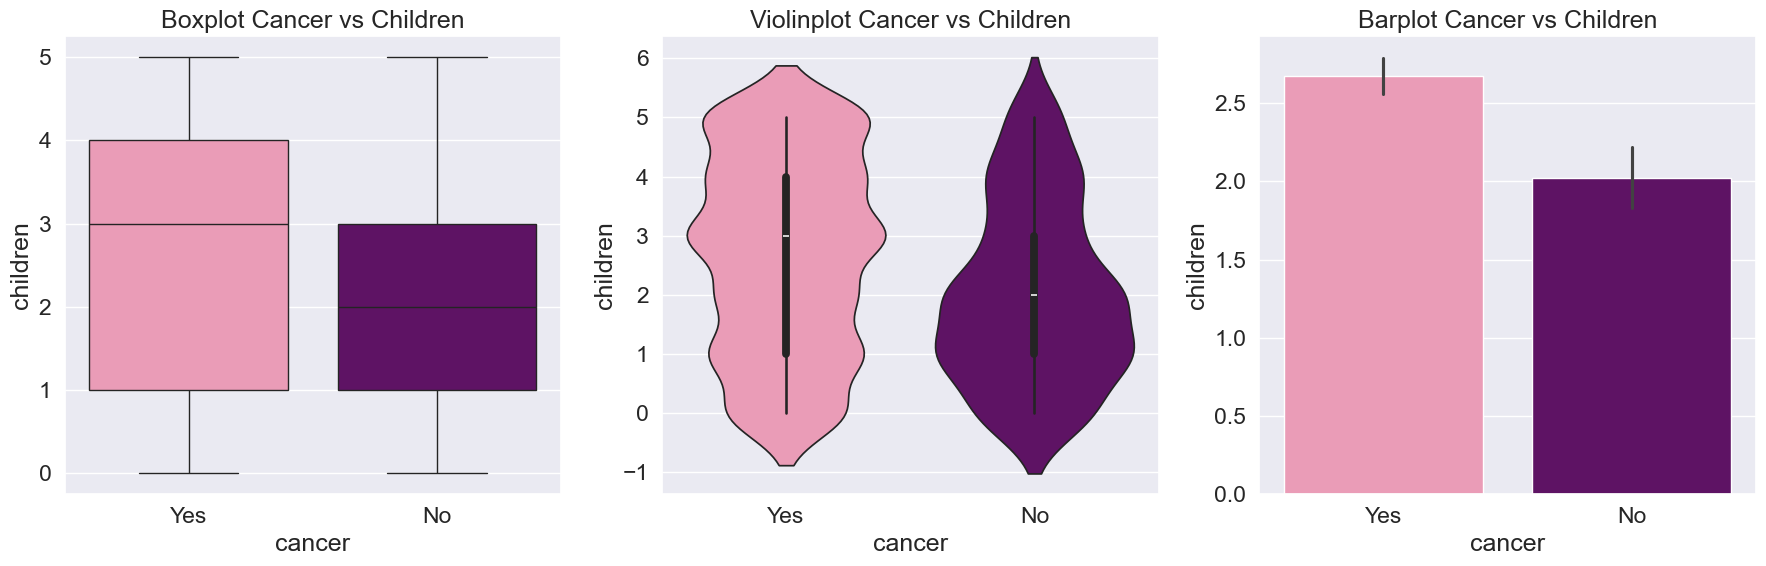

In [494]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) 
sns.boxplot(data=df, x="cancer", y="children", palette=colores)
plt.title("Boxplot Cancer vs Children")

plt.subplot(1, 3, 2)
sns.violinplot(data=df, x="cancer", y="children", palette=colores)
plt.title("Violinplot Cancer vs Children")

plt.subplot(1, 3, 3)
sns.barplot(data=df, x="cancer", y="children", palette=colores)
plt.title("Barplot Cancer vs Children")

plt.tight_layout()
plt.show()

In the Boxplot we can see that the average number of children of patients with cancer is higher than in those without cancer. The Violin Plot confirms that the distribution of the number of children is different for those who have cancer and those who do not; with a higher frequency of high numbers of children in cancer patients than in patients who do not have cancer.

# Cancer VS Years worked

In [147]:
cancer_work_group = df[df['cancer'] == 'Yes']['years_worked']
no_cancer_work_group = df[df['cancer'] == 'No']['years_worked']

First, we compare the average of worked years between people who have cancer and those who do not:

In [149]:
cancer_work_group.mean()

11.463917525773196

In [150]:
no_cancer_work_group.mean()

6.133928571428571

We can see that the average number of years worked is **almost double for patients with cancer than for patients without cancer**.

Null Hypothesis (H₀): The average of worked years of Cancer patients class is equal to the average of worked years in people with no cancer. 
( H_0: mu0 = mu1 )

Alternative Hypothesis (H₁): The average of worked years of Cancer patients class is higher than the average of worked years in people with no cancer. 
( H_1: mu0 > mu1 )

This is a one-tailed Student t-test, in which the alternative hypothesis will be that the average worked years in cancer patients is higher than that of patients without cancer.

In [153]:
t_stat, p_value = st.ttest_ind(
    cancer_work_group, 
    no_cancer_work_group, 
    equal_var=False,  # different variance
    alternative='greater'  # alternative hypothesis: higher worked years in cancer patients
)

print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.20f}")
print()

alpha = 0.05

if p_value > alpha:
    print("The Null Hypothesis is not rejected: There is no sufficient evidence to conclude that the number of worked years in cancer patients is equal to that of patients without cancer.")
else:
    print("Null Hypothesis is rejected: There is sufficient evidence to conclude that the number of worked years in cancer patients is greater than that of patients without cancer.")

Test Statistic (t): 6.33
P-Value: 0.00000000028139814400

Null Hypothesis is rejected: There is sufficient evidence to conclude that the number of worked years in cancer patients is greater than that of patients without cancer.


Since the p-value is much lower than the significance level (0.05), we can reject the null hypothesis;the average of years worked in cancer patients is significantly higher than that of non-cancer patients, based on the data analyzed.

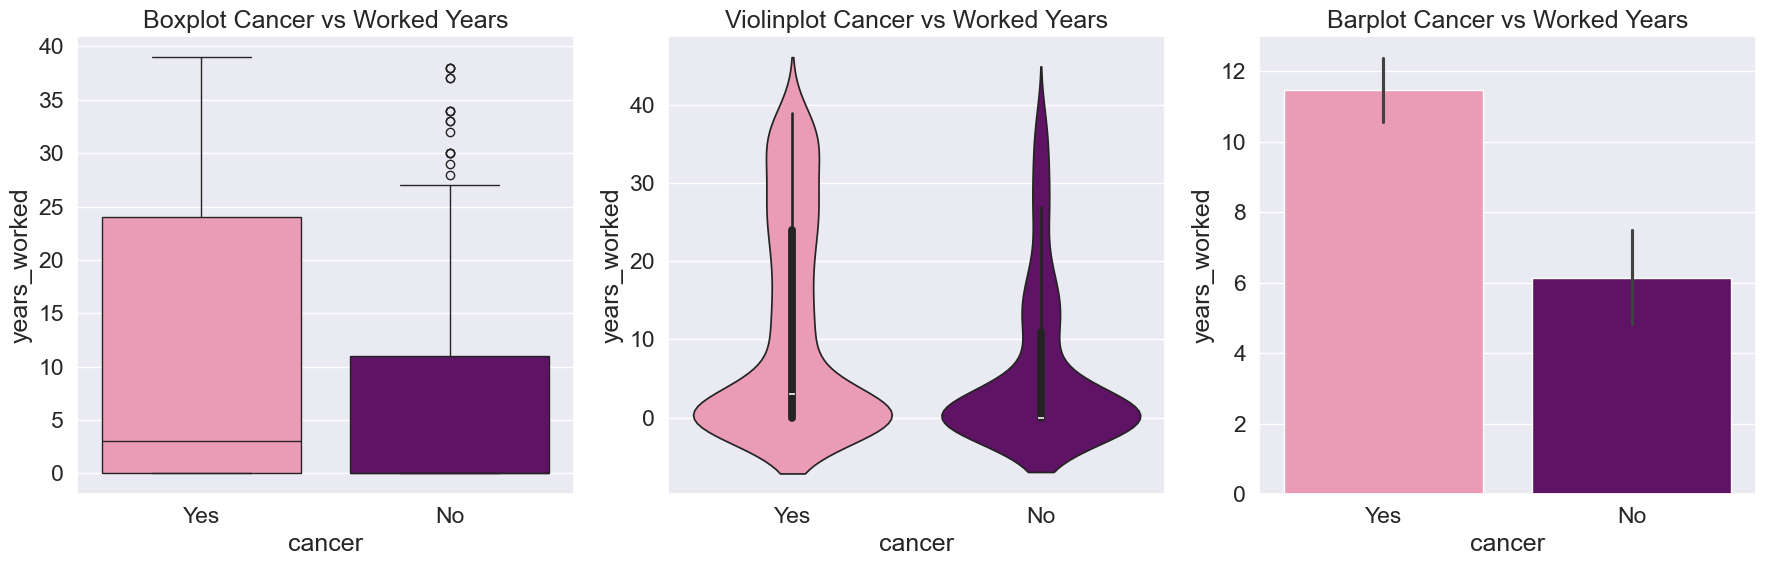

In [522]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) 
sns.boxplot(data=df, x="cancer", y="years_worked", palette=colores)
plt.title("Boxplot Cancer vs Worked Years")

plt.subplot(1, 3, 2)
sns.violinplot(data=df, x="cancer", y="years_worked", palette=colores)
plt.title("Violinplot Cancer vs Worked Years")

plt.subplot(1, 3, 3)
sns.barplot(data=df, x="cancer", y="years_worked", palette=colores)
plt.title("Barplot Cancer vs Worked Years")

plt.tight_layout()
plt.show()

- First of all, from the boxplot and the barplot we can see that, indeed, there is a higher incidence of cancer in those people who have worked more years than in those who have not.
- From the boxplot we can see that in patients who do not have cancer there are a large number of outliers. These outliers may be distorting the result of the average a little. If we wanted a more precise result, it would be interesting to work on the outliers.
- This difference can be explained because, as we have seen before, in older patients the incidence of cancer is also higher, so these patients will have also worked more years of their life.

## Data Pre - Processing

#### Elimination of 'id' column

In [159]:
df.drop(columns='id', inplace=True)

In [160]:
df.head(1)

,gender,age,marital_status,children,smoker,employed,years_worked,income_level,social_media,online_gaming,cancer
0,Male,23,Married,3,No,No,0,Low,Yes,No,Yes


Separating numerical and categorical variables:

#### UPSAMPLING

Let's upsample the minority class just repeating samples from the minority class.

In this case, since we only have 1000 rows, of which only 250 are negative compared to 700 positive, we use Upsampling.

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [166]:
counts_cancer= df['cancer'].value_counts()
counts_cancer

cancer
Yes    776
No     224
Name: count, dtype: int64

In [167]:
# Dividir en clases 'Yes' y 'No'
yes = df[df['cancer'] == 'Yes']
no = df[df['cancer'] == 'No']

In [168]:
# Hacer upsampling de la clase minoritaria ('No') para igualar a la mayoritaria ('Yes')
no_upsampled = no.sample(counts_cancer['Yes'], replace=True, random_state=42)

In [169]:
# Combinar ambas clases
df_up = pd.concat([yes, no_upsampled])

In [170]:
df_up

,gender,age,marital_status,children,smoker,employed,years_worked,income_level,social_media,online_gaming,cancer
0,Male,23,Married,3,No,No,0,Low,Yes,No,Yes
1,Male,55,Single,4,Yes,No,0,Low,No,No,Yes
2,Female,43,Single,3,No,Yes,25,Low,Yes,Yes,Yes
6,Female,67,Separated,0,Yes,No,0,Low,Yes,No,Yes
9,Female,87,Married,5,Yes,No,0,Low,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
420,Female,58,Married,1,No,No,0,Low,No,No,No
788,Male,71,Widowed,1,No,Yes,10,Medium,No,Yes,No
726,Female,61,Widowed,1,No,Yes,15,High,Yes,No,No
350,Male,66,Widowed,4,No,No,0,Low,Yes,Yes,No


In [171]:
df_up.cancer.value_counts()

cancer
Yes    776
No     776
Name: count, dtype: int64

In [174]:
cat = df_up.select_dtypes(exclude="number")
num = df_up.select_dtypes(include="number")

In [175]:
cat.shape

(1552, 8)

In [176]:
num.shape

(1552, 3)

#### Mapping

Mapping 'gender', 'smoker', 'employed', 'social_media' and 'online_gaming' as booleans because they have just 2 unique values. Let's explore each one of:

In [179]:
cat.gender.unique()

array(['Male', 'Female'], dtype=object)

In [180]:
cat.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [181]:
cat.employed.unique()

array(['No', 'Yes'], dtype=object)

In [182]:
cat['social_media'].unique()

array(['Yes', 'No'], dtype=object)

In [183]:
cat['online_gaming'].unique()

array(['No', 'Yes'], dtype=object)

In [184]:
mapping_gender = {"Male": 0, 
           "Female": 1}

In [185]:
mapping_rest = {"No":0,
          "Yes": 1}

In [186]:
cat["gender"] = cat["gender"].map(mapping_gender)

In [187]:
cat["smoker"] = cat["smoker"].map(mapping_rest)

In [188]:
cat["employed"] = cat["employed"].map(mapping_rest)

In [189]:
cat['social_media'] = cat['social_media'].map(mapping_rest)

In [190]:
cat['online_gaming'] = cat['online_gaming'].map(mapping_rest)

In [191]:
cat['cancer'] = cat['cancer'].map(mapping_rest)

In [192]:
cat

,gender,marital_status,smoker,employed,income_level,social_media,online_gaming,cancer
0,0,Married,0,0,Low,1,0,1
1,0,Single,1,0,Low,0,0,1
2,1,Single,0,1,Low,1,1,1
6,1,Separated,1,0,Low,1,0,1
9,1,Married,1,0,Low,0,1,1
...,...,...,...,...,...,...,...,...
420,1,Married,0,0,Low,0,0,0
788,0,Widowed,0,1,Medium,0,1,0
726,1,Widowed,0,1,High,1,0,0
350,0,Widowed,0,0,Low,1,1,0


#### Get_dummies :)

Let's address the first question first. You can use a method called One Hot Encoding which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses 1 and 0 to indicate whether the data record has the corresponding categorical value.

In [195]:
cat['marital_status'].unique()

array(['Married', 'Single', 'Separated', 'Widowed'], dtype=object)

In [196]:
cat['income_level'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [197]:
cat_dummy = pd.get_dummies(cat, columns=['marital_status','income_level'])

In [198]:
cat_dummy = cat_dummy.astype(int)

In [199]:
cat_dummy

,gender,smoker,employed,social_media,online_gaming,cancer,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,income_level_High,income_level_Low,income_level_Medium
0,0,0,0,1,0,1,1,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,1,0,1,1,1,1,0,0,1,0,0,1,0
6,1,1,0,1,0,1,0,1,0,0,0,1,0
9,1,1,0,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1,0,0,0,0,0,1,0,0,0,0,1,0
788,0,0,1,0,1,0,0,0,0,1,0,0,1
726,1,0,1,1,0,0,0,0,0,1,1,0,0
350,0,0,0,1,1,0,0,0,0,1,0,1,0


In [200]:
num.shape

(1552, 3)

In [201]:
cat_dummy.shape

(1552, 13)

In [202]:
num

,age,children,years_worked
0,23,3,0
1,55,4,0
2,43,3,25
6,67,0,0
9,87,5,0
...,...,...,...
420,58,1,0
788,71,1,10
726,61,1,15
350,66,4,0


In [203]:
cat_dummy

,gender,smoker,employed,social_media,online_gaming,cancer,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,income_level_High,income_level_Low,income_level_Medium
0,0,0,0,1,0,1,1,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,1,0,1,1,1,1,0,0,1,0,0,1,0
6,1,1,0,1,0,1,0,1,0,0,0,1,0
9,1,1,0,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1,0,0,0,0,0,1,0,0,0,0,1,0
788,0,0,1,0,1,0,0,0,0,1,0,0,1
726,1,0,1,1,0,0,0,0,0,1,1,0,0
350,0,0,0,1,1,0,0,0,0,1,0,1,0


In [204]:
num = num.reset_index(drop=True)
cat_dummy = cat_dummy.reset_index(drop=True)

In [205]:
num = num.reset_index(drop=False)
cat_dummy = cat_dummy.reset_index(drop=False)

In [206]:
num

,index,age,children,years_worked
0,0,23,3,0
1,1,55,4,0
2,2,43,3,25
3,3,67,0,0
4,4,87,5,0
...,...,...,...,...
1547,1547,58,1,0
1548,1548,71,1,10
1549,1549,61,1,15
1550,1550,66,4,0


In [207]:
cat_dummy

,index,gender,smoker,employed,social_media,online_gaming,cancer,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,income_level_High,income_level_Low,income_level_Medium
0,0,0,0,0,1,0,1,1,0,0,0,0,1,0
1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,2,1,0,1,1,1,1,0,0,1,0,0,1,0
3,3,1,1,0,1,0,1,0,1,0,0,0,1,0
4,4,1,1,0,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1547,1,0,0,0,0,0,1,0,0,0,0,1,0
1548,1548,0,0,1,0,1,0,0,0,0,1,0,0,1
1549,1549,1,0,1,1,0,0,0,0,0,1,1,0,0
1550,1550,0,0,0,1,1,0,0,0,0,1,0,1,0


In [208]:
# Ahora puedes realizar el merge sin perder la columna de índice original
df_final = num.merge(cat_dummy, on='index', how='inner')

In [209]:
df_final

,index,age,children,years_worked,gender,smoker,employed,social_media,online_gaming,cancer,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,income_level_High,income_level_Low,income_level_Medium
0,0,23,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0
1,1,55,4,0,0,1,0,0,0,1,0,0,1,0,0,1,0
2,2,43,3,25,1,0,1,1,1,1,0,0,1,0,0,1,0
3,3,67,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0
4,4,87,5,0,1,1,0,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1547,58,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1548,1548,71,1,10,0,0,1,0,1,0,0,0,0,1,0,0,1
1549,1549,61,1,15,1,0,1,1,0,0,0,0,0,1,1,0,0
1550,1550,66,4,0,0,0,0,1,1,0,0,0,0,1,0,1,0


In [210]:
print(num['index'].duplicated().sum())  # Número de duplicados en num
print(cat_dummy['index'].duplicated().sum())  # Número de duplicados en cat_dummy

0
0


In [211]:
# Quitamos index
df_final.drop(columns='index', inplace=True)

In [212]:
df_final.shape

(1552, 16)

### Understanding the Multicollinearity

In [214]:
num_corr = round(df_final.corr(), 2)

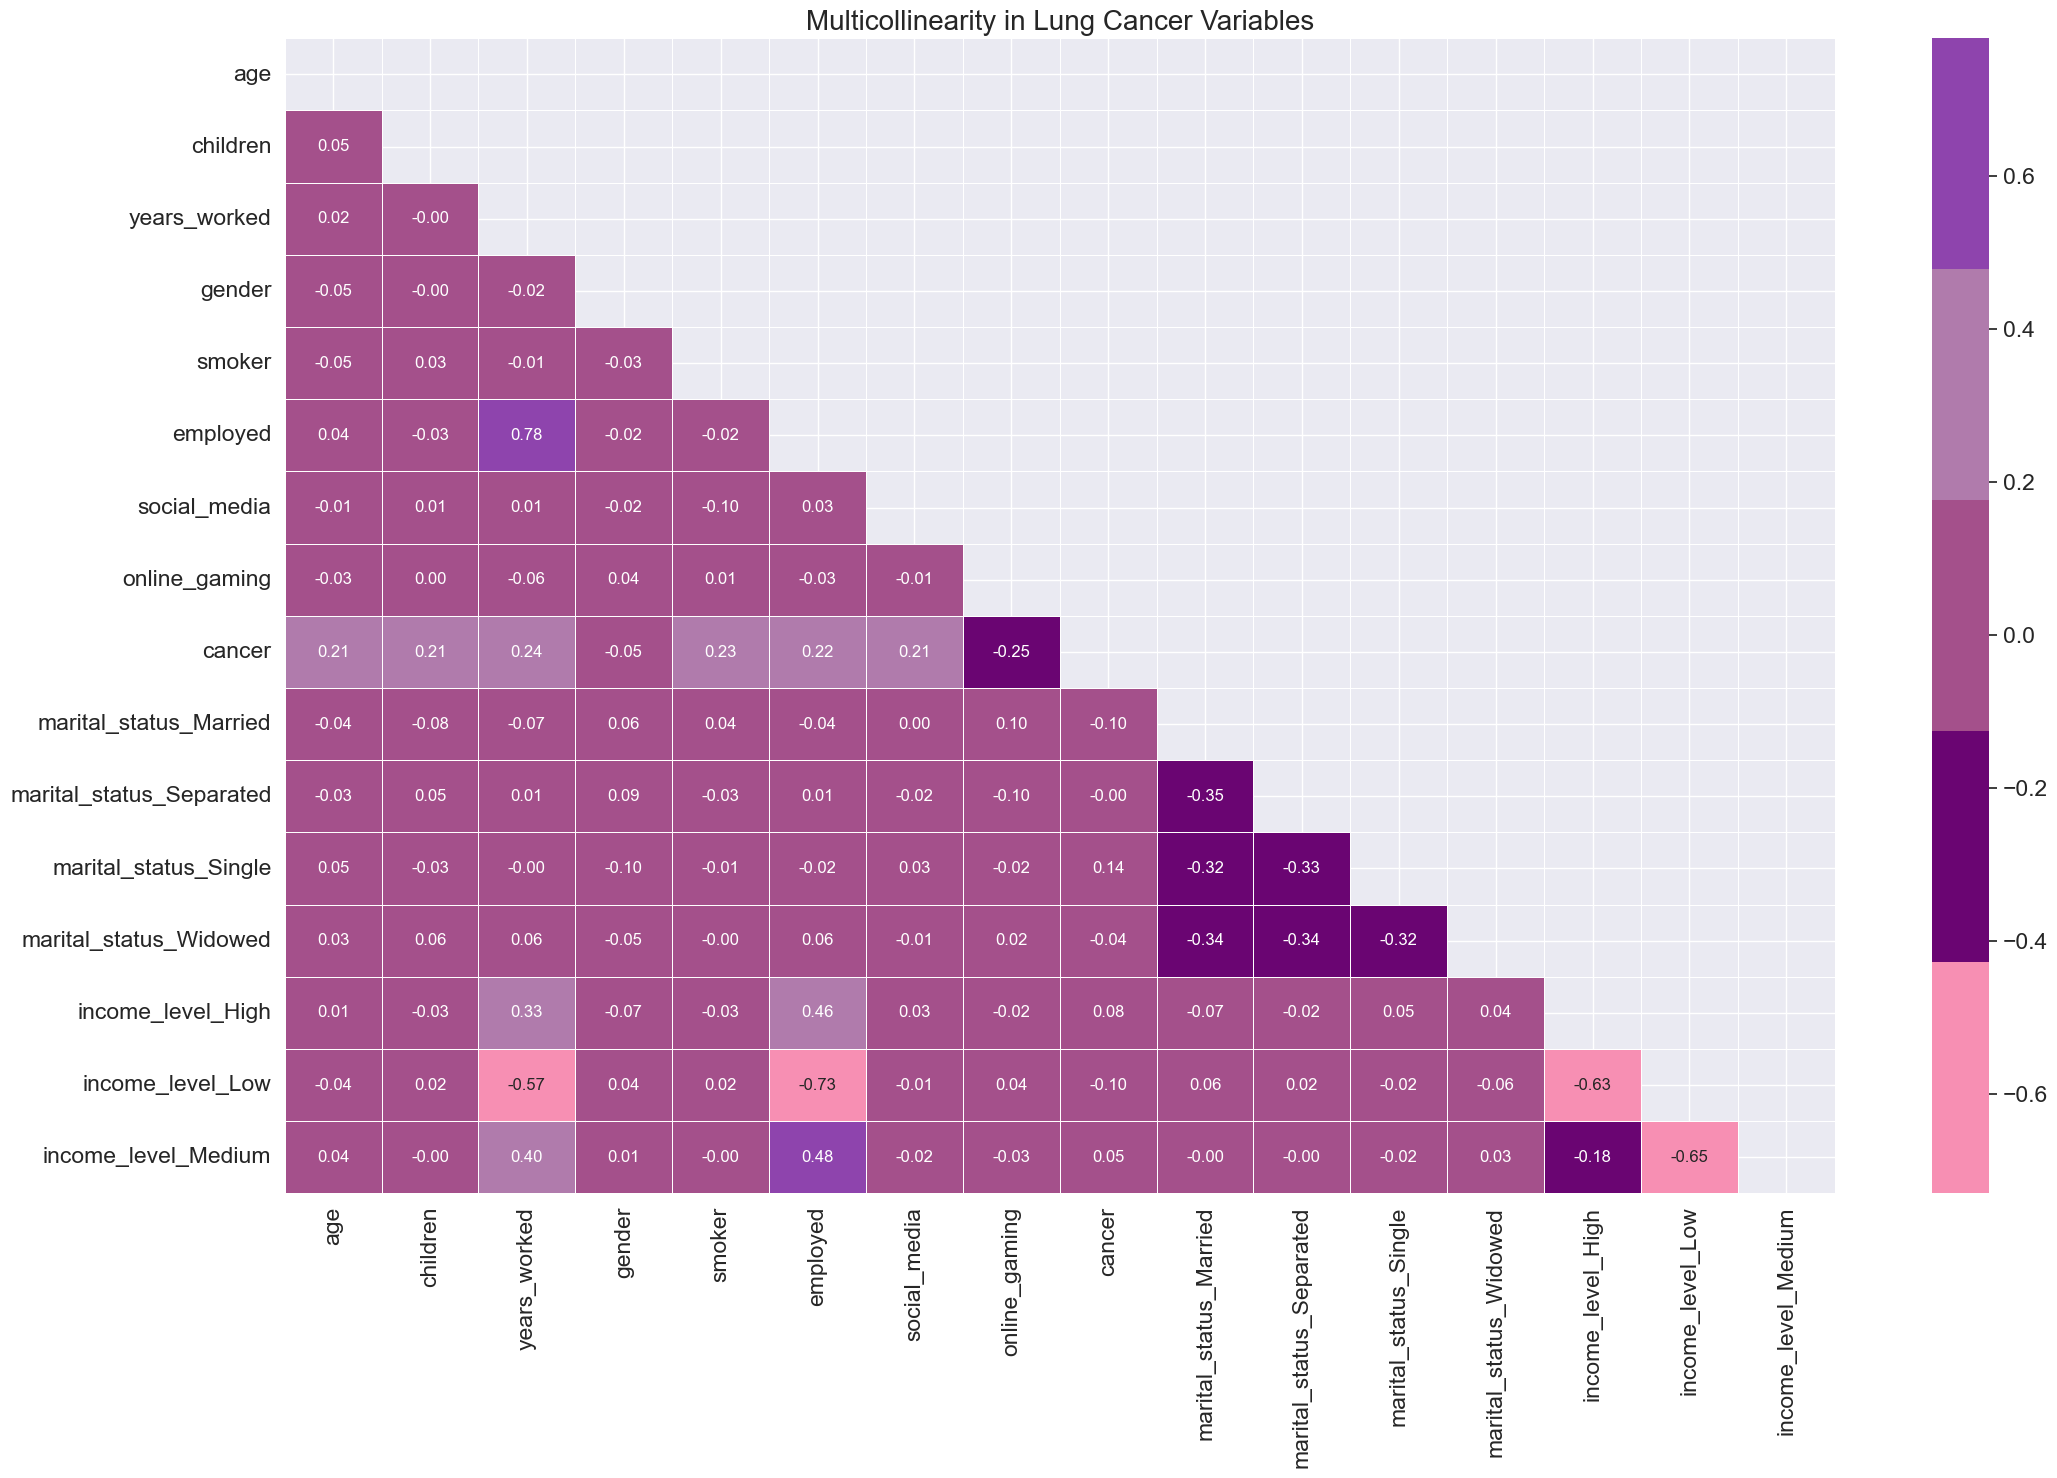

In [606]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap=colores, fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Multicollinearity in Lung Cancer Variables", fontsize=20) # add title
plt.show()

In [216]:
df_final

,age,children,years_worked,gender,smoker,employed,social_media,online_gaming,cancer,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,income_level_High,income_level_Low,income_level_Medium
0,23,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0
1,55,4,0,0,1,0,0,0,1,0,0,1,0,0,1,0
2,43,3,25,1,0,1,1,1,1,0,0,1,0,0,1,0
3,67,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0
4,87,5,0,1,1,0,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,58,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1548,71,1,10,0,0,1,0,1,0,0,0,0,1,0,0,1
1549,61,1,15,1,0,1,1,0,0,0,0,0,1,1,0,0
1550,66,4,0,0,0,0,1,1,0,0,0,0,1,0,1,0


### X-y Split

In [218]:
y = df_final['cancer']
X = df_final.drop(columns=['cancer'])

# Modeling

### Train-Test Split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [222]:
print(f'100% of our data: {len(df_final)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 1552.
70% for training data: 1086.
30% for test data: 466.


### Model Selection: Logistic Regression

Logistic regression is one of the most popular and used algorithms for classification problems. Since it is also relatively uncomplicated and easy to implement, it is often used as a starting model, although it can also produce very high-performance results used in production. Here we are going to talk about Binomial Logistic Regression, which is used for binary results. Multinomial Logistic Regression exists and can be used for multiclass classification problems, but it is used less frequently. We will not cover it in this lesson.

In [225]:
model_logistic= LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

### Model Validation

In [227]:
predictions_logistic= model_logistic.predict(X_test)
print(f'30% for test prediction data: {len(predictions_logistic)}.')

30% for test prediction data: 466.


#### Metrics

In [229]:
print(classification_report(y_test, predictions_logistic))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       239
           1       0.74      0.74      0.74       227

    accuracy                           0.74       466
   macro avg       0.74      0.74      0.74       466
weighted avg       0.74      0.74      0.74       466



#### Precision = Percentage of POSITIVE predictions that were correct.
- Proportion of Positive Positives
- Total number of predicted Positives (True Positives plus False Positives, TP+FP) --> how many are True Positives (TP).
- Measure quality of the machine learning model in classification tasks.
  
#### Recall
- Proportion of real positives correctly classified
- Percentage of positive cases captured
- Amount that the machine learning model is capable of identifying.

#### Differentiating precision and recall
- Precision focuses on what the model says and then compares it to reality.
- Recall starts from reality, and then evaluates how good the model is at recognizing it.

#### F1 Score
- Combine the precision and recall measurements into a single value.
- It makes it easier to compare the combined accuracy and recall performance between various solutions.

In [231]:
print("Test data accuracy: ",model_logistic.score(X_test,y_test))
print("Train data accuracy: ", model_logistic.score(X_train, y_train))

Test data accuracy:  0.7446351931330472
Train data accuracy:  0.7651933701657458


In [232]:
cm_logistic = confusion_matrix(y_test, predictions_logistic)

<Figure size 800x600 with 0 Axes>

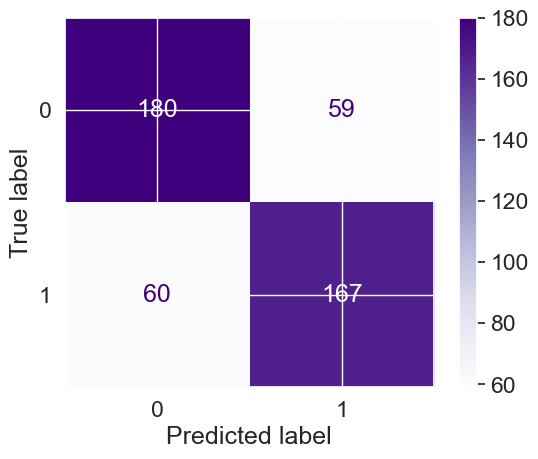

In [526]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Purples')  
plt.grid(True)
plt.show()

# Improving the Model

### Selecting the Model: K-Nearest Neighbors

In [236]:
model_kn = KNeighborsClassifier(n_neighbors=11)
model_kn = model_kn.fit(X_train, y_train)
predictions_kn = model_kn.predict(X_test)

#### Metrics

In [238]:
print(classification_report(y_test, predictions_kn))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       239
           1       0.75      0.63      0.69       227

    accuracy                           0.72       466
   macro avg       0.73      0.72      0.72       466
weighted avg       0.73      0.72      0.72       466



In [239]:
print("Test data accuracy: ",model_kn.score(X_test,y_test))
print("Train data accuracy: ", model_kn.score(X_train, y_train))

Test data accuracy:  0.721030042918455
Train data accuracy:  0.7384898710865562


In [240]:
cm_kn = confusion_matrix(y_test, predictions_kn)

<Figure size 800x600 with 0 Axes>

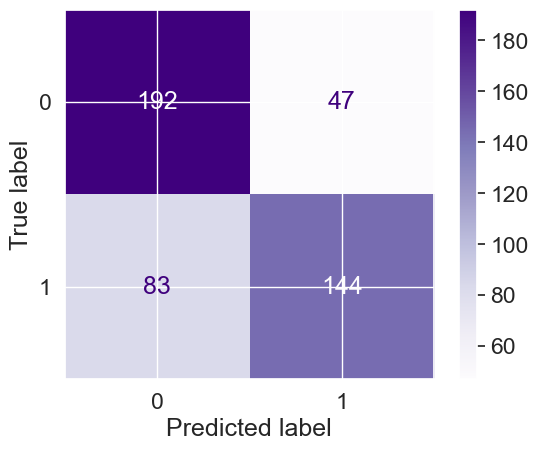

In [528]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kn)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Purples')  
plt.grid(True)
plt.show()

#### Hyperparameter Tunning

Repeat the fitting process using different values for the n_neighbors parameter:

In [243]:
n_neighbors = range(1, 30)
test = []
train = []

for neighbors in n_neighbors:
    model_kn = KNeighborsClassifier(n_neighbors=neighbors)
    model_kn.fit(X_train, y_train)
    test.append(model_kn.score(X_test,y_test))
    train.append(model_kn.score(X_train,y_train))

Let's review Which is the ideal number of neighbors in plotly:

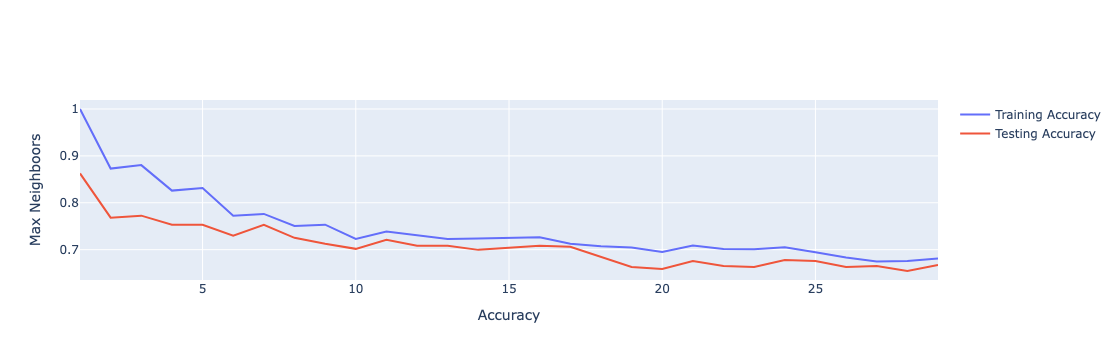

In [599]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(n_neighbors), y=train, name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(n_neighbors), y=test, name='Testing Accuracy'))
fig.update_layout(xaxis_title='Accuracy', yaxis_title='Max Neighboors', title='')
fig.show()

The best performing 'n_neighbors' is **3**.

In [247]:
model_kn_optimized= KNeighborsClassifier(n_neighbors=3)
model_kn_optimized = model_kn_optimized.fit(X_train, y_train)
predictions_kn_optimized = model_kn_optimized.predict(X_test)

#### Metrics

In [249]:
print(classification_report(y_test, predictions_kn_optimized))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       239
           1       0.82      0.68      0.74       227

    accuracy                           0.77       466
   macro avg       0.78      0.77      0.77       466
weighted avg       0.78      0.77      0.77       466



In [250]:
print("Test data accuracy: ",model_kn_optimized.score(X_test,y_test))
print("Train data accuracy: ", model_kn_optimized.score(X_train, y_train))

Test data accuracy:  0.7725321888412017
Train data accuracy:  0.8802946593001841


In [251]:
cm_kn_optimized = confusion_matrix(y_test, predictions_kn_optimized)

<Figure size 800x600 with 0 Axes>

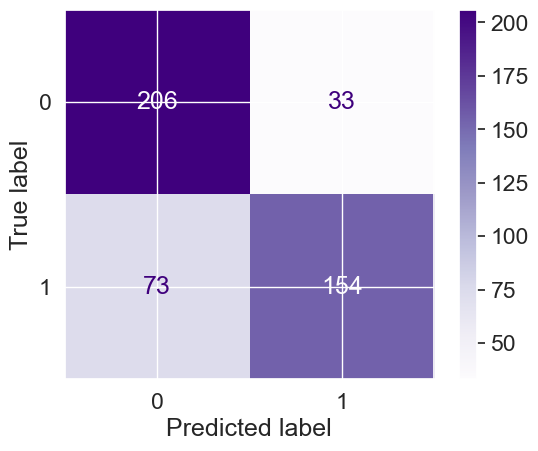

In [530]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kn_optimized)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Purples')  
plt.grid(True)
plt.show()

Let's try with 'n_neighbors' = 1.

In [254]:
model_kn_optimized_1 = KNeighborsClassifier(n_neighbors=1)
model_kn_optimized_1 = model_kn_optimized_1.fit(X_train, y_train)
predictions_kn_optimized_1 = model_kn_optimized_1.predict(X_test)

#### Metrics

In [256]:
print(classification_report(y_test, predictions_kn_optimized_1))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       239
           1       0.93      0.78      0.85       227

    accuracy                           0.86       466
   macro avg       0.87      0.86      0.86       466
weighted avg       0.87      0.86      0.86       466



In [257]:
print("Test data accuracy: ",model_kn_optimized_1.score(X_test,y_test))
print("Train data accuracy: ", model_kn_optimized_1.score(X_train, y_train))

Test data accuracy:  0.8626609442060086
Train data accuracy:  1.0


In [258]:
cm_kn_optimized_1 = confusion_matrix(y_test, predictions_kn_optimized_1)

<Figure size 800x600 with 0 Axes>

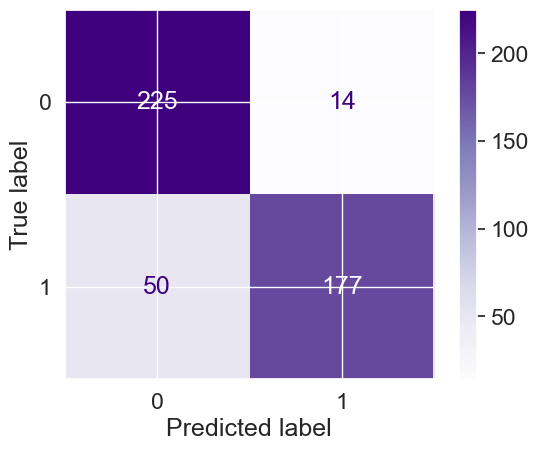

In [586]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kn_optimized_1)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Purples')  
plt.grid(True)
plt.show()

In the case of 'n-neighbors' = 1, we get a test data accuracy of 0.86, which is quite good. However, the train data accuracy is 1.0, which makes us suspect that the model is not entirely reliable. Therefore, we stick with 'n-neighbors'=3, which gives us a test data accuracy of 0.77 and a train data accuracy of 0.88.

### Selecting the Model: Decision Trees (tree-based)

In [262]:
model_tree = DecisionTreeClassifier(max_depth=3)
model_tree = model_tree.fit(X_train, y_train)
model_tree.predict(X_test)
predictions_tree = model_tree.predict(X_test)

#### Metrics

In [264]:
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74       239
           1       0.84      0.41      0.55       227

    accuracy                           0.67       466
   macro avg       0.73      0.66      0.64       466
weighted avg       0.73      0.67      0.65       466



In [265]:
print("Test data accuracy: ",model_tree.score(X_test,y_test))
print("Train data accuracy: ", model_tree.score(X_train, y_train))

Test data accuracy:  0.6716738197424893
Train data accuracy:  0.7007366482504604


In [266]:
cm_tree = confusion_matrix(y_test, predictions_tree)

<Figure size 800x600 with 0 Axes>

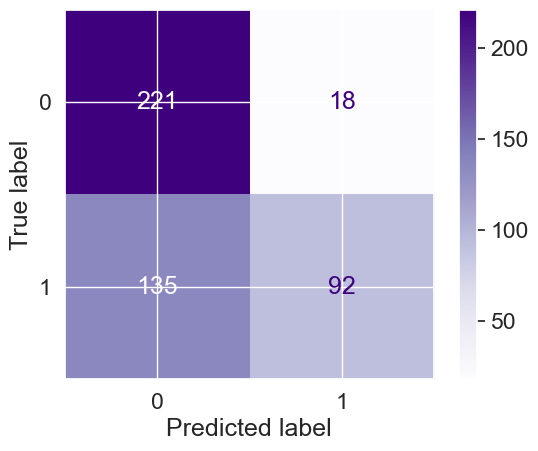

In [588]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Purples')  
plt.grid(True)
plt.show()

Not only does this model obtain the smallest test and train data accuracy, but we can see from the confusion matrix that it leads to many false negatives. We discard it.

# First Conclusions 

For the moment we will stick with K-Nearest Neighbors, with 'n-neighbors'=3, where we have obtained a test data accuracy of 0.77 and a train data accuracy of 0.88.

However, although the model is satisfactory, we seek to optimize it with different steps:

1.Improve data preprocessing: normalize or standardize your data and apply feature engineering.

#### Standardization or normalization

In [271]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [272]:
scaler_minmax= MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

#### Outlier management

#### Feature engineering

We eliminate the columns that are irrelevant for the analysis.

Although the columns corresponding to 'Social_Media' and 'Online_gaming' have Chi2 values ​​that suggest a correlation between these columns and the target, 'cancer', it is decided to eliminate them because no logical relationship is found between the use of social networks or video games and the incidence of lung cancer.
Furthermore, according to the correlation matrix, there is multicollinearity between the 'employed' and 'years_worked' columns, and since the 'employed' column has no correlation with the target, it is also eliminated.

In [276]:
df_final.drop(columns=["social_media","online_gaming","employed"], inplace=True)

In [277]:
df_final

,age,children,years_worked,gender,smoker,cancer,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,income_level_High,income_level_Low,income_level_Medium
0,23,3,0,0,0,1,1,0,0,0,0,1,0
1,55,4,0,0,1,1,0,0,1,0,0,1,0
2,43,3,25,1,0,1,0,0,1,0,0,1,0
3,67,0,0,1,1,1,0,1,0,0,0,1,0
4,87,5,0,1,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,58,1,0,1,0,0,1,0,0,0,0,1,0
1548,71,1,10,0,0,0,0,0,0,1,0,0,1
1549,61,1,15,1,0,0,0,0,0,1,1,0,0
1550,66,4,0,0,0,0,0,0,0,1,0,1,0


To ensure good model performance, we use LazyClassifier, which indicates that several models perform well on the data.

In [279]:
from lazypredict.Supervised import LazyClassifier

In [280]:
clf = LazyClassifier(verbose=1, ignore_warnings=True,custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

 14%|██████                                      | 4/29 [00:00<00:01, 16.16it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7660944206008584, 'Balanced Accuracy': 0.7672110298048034, 'ROC AUC': 0.7672110298048035, 'F1 Score': 0.7658217543876301, 'Time taken': 0.16107797622680664}
{'Model': 'BaggingClassifier', 'Accuracy': 0.8605150214592274, 'Balanced Accuracy': 0.8587082741968186, 'ROC AUC': 0.8587082741968187, 'F1 Score': 0.8596514476952772, 'Time taken': 0.05798196792602539}
{'Model': 'BernoulliNB', 'Accuracy': 0.7017167381974249, 'Balanced Accuracy': 0.7001363979872081, 'ROC AUC': 0.700136397987208, 'F1 Score': 0.7004381068750218, 'Time taken': 0.016149044036865234}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7467811158798283, 'Balanced Accuracy': 0.7463919045951376, 'ROC AUC': 0.7463919045951376, 'F1 Score': 0.7467063993810562, 'Time taken': 0.040894269943237305}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8412017167381974, 'Balanced Accuracy': 0.8386632997253608, 'ROC AUC': 0.8386632997253608, 'F1 Score': 0.8393734811996633, 'Time taken': 0.015

 41%|█████████████████▊                         | 12/29 [00:00<00:00, 19.83it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.907725321888412, 'Balanced Accuracy': 0.9069452380513521, 'ROC AUC': 0.906945238051352, 'F1 Score': 0.9075868231497268, 'Time taken': 0.19090914726257324}
{'Model': 'GaussianNB', 'Accuracy': 0.6995708154506438, 'Balanced Accuracy': 0.6979337548154019, 'ROC AUC': 0.6979337548154019, 'F1 Score': 0.698194795413118, 'Time taken': 0.016232967376708984}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.7510729613733905, 'Balanced Accuracy': 0.7482535527989236, 'ROC AUC': 0.7482535527989235, 'F1 Score': 0.7477159502323099, 'Time taken': 0.05272412300109863}
{'Model': 'LabelPropagation', 'Accuracy': 0.8583690987124464, 'Balanced Accuracy': 0.856173852137209, 'ROC AUC': 0.856173852137209, 'F1 Score': 0.8571154709897348, 'Time taken': 0.06997513771057129}


 62%|██████████████████████████▋                | 18/29 [00:00<00:00, 20.16it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.8583690987124464, 'Balanced Accuracy': 0.856173852137209, 'ROC AUC': 0.856173852137209, 'F1 Score': 0.8571154709897348, 'Time taken': 0.11022591590881348}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.740343347639485, 'Balanced Accuracy': 0.739673382117118, 'ROC AUC': 0.7396733821171181, 'F1 Score': 0.7401168976600367, 'Time taken': 0.01743912696838379}
{'Model': 'LinearSVC', 'Accuracy': 0.7467811158798283, 'Balanced Accuracy': 0.7463919045951376, 'ROC AUC': 0.7463919045951376, 'F1 Score': 0.7467063993810562, 'Time taken': 0.0401768684387207}
{'Model': 'LogisticRegression', 'Accuracy': 0.7467811158798283, 'Balanced Accuracy': 0.7465024975577388, 'ROC AUC': 0.7465024975577389, 'F1 Score': 0.746748436451568, 'Time taken': 0.034387826919555664}
{'Model': 'NearestCentroid', 'Accuracy': 0.703862660944206, 'Balanced Accuracy': 0.7024496341216154, 'ROC AUC': 0.7024496341216153, 'F1 Score': 0.7028371483071054, 'Time taken': 0.015511035919189453

 90%|██████████████████████████████████████▌    | 26/29 [00:01<00:00, 20.09it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8862660944206009, 'Balanced Accuracy': 0.8848082133706892, 'ROC AUC': 0.884808213370689, 'F1 Score': 0.8857785587365191, 'Time taken': 0.20639681816101074}
{'Model': 'RidgeClassifier', 'Accuracy': 0.740343347639485, 'Balanced Accuracy': 0.739673382117118, 'ROC AUC': 0.7396733821171181, 'F1 Score': 0.7401168976600367, 'Time taken': 0.045616865158081055}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.740343347639485, 'Balanced Accuracy': 0.739673382117118, 'ROC AUC': 0.7396733821171181, 'F1 Score': 0.7401168976600367, 'Time taken': 0.01755809783935547}
{'Model': 'SGDClassifier', 'Accuracy': 0.7124463519313304, 'Balanced Accuracy': 0.7109284279210366, 'ROC AUC': 0.7109284279210366, 'F1 Score': 0.711295391346084, 'Time taken': 0.016640901565551758}
{'Model': 'SVC', 'Accuracy': 0.7746781115879828, 'Balanced Accuracy': 0.772924999539196, 'ROC AUC': 0.7729249995391961, 'F1 Score': 0.7734347760487236, 'Time taken': 0.07419300079345703}


100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 18.04it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.8948497854077253, 'Balanced Accuracy': 0.8935081930953127, 'ROC AUC': 0.8935081930953127, 'F1 Score': 0.8944577809120912, 'Time taken': 0.08265900611877441}
[LightGBM] [Info] Number of positive: 549, number of negative: 537
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 1086, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505525 -> initscore=0.022100
[LightGBM] [Info] Start training from score 0.022100
{'Model': 'LGBMClassifier', 'Accuracy': 0.8841201716738197, 'Balanced Accuracy': 0.882605570198883, 'ROC AUC': 0.882605570198883, 'F1 Score': 0.8835894210879169, 'Time taken': 0.14824295043945312}
                               Accuracy  Balanced Accur

After applying Lazy Classifier, I conclude that the models with the best results are:

#### ExtraTreesClassifier: 
- Analyzes which features are most important.
- For tabular data with complex non-linear relationships.
- Handles irrelevant features without problems.
- Scalable to large datasets.

#### XGBClassifier
- Control over tuning with advanced hyperparameters.
- Supports regularization to avoid overfitting.
- Large dataset / further optimize performance.
- On problems where relationships between features are non-linear.

#### RandomForestClassifier
- Easy to tune and understand.
- Less sensitive to noisy data.
- Trade-off between accuracy and speed.
- For tabular datasets with noise or missing values.

In [282]:
df_final

,age,children,years_worked,gender,smoker,cancer,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,income_level_High,income_level_Low,income_level_Medium
0,23,3,0,0,0,1,1,0,0,0,0,1,0
1,55,4,0,0,1,1,0,0,1,0,0,1,0
2,43,3,25,1,0,1,0,0,1,0,0,1,0
3,67,0,0,1,1,1,0,1,0,0,0,1,0
4,87,5,0,1,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,58,1,0,1,0,0,1,0,0,0,0,1,0
1548,71,1,10,0,0,0,0,0,0,1,0,0,1
1549,61,1,15,1,0,0,0,0,0,1,1,0,0
1550,66,4,0,0,0,0,0,0,0,1,0,1,0


#### ExtraTreesClassifier: 

In [284]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Predicción
y_pred = et_model.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.907725321888412
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       239
           1       0.93      0.88      0.90       227

    accuracy                           0.91       466
   macro avg       0.91      0.91      0.91       466
weighted avg       0.91      0.91      0.91       466



#### XGBClassifier

In [286]:
# Modelo
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predicción
y_pred = xgb_model.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8948497854077253
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       239
           1       0.94      0.84      0.89       227

    accuracy                           0.89       466
   macro avg       0.90      0.89      0.89       466
weighted avg       0.90      0.89      0.89       466



#### RandomForestClassifier

In [288]:
# Modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicción
y_pred = rf_model.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8862660944206009
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       239
           1       0.93      0.83      0.88       227

    accuracy                           0.89       466
   macro avg       0.89      0.88      0.89       466
weighted avg       0.89      0.89      0.89       466



As predicted by the Lazy Classifier, the model with the highest accuracy is the ExtraTreesClassifier. We choose this model to make our prediction model.

Next, we check if we get a slightly better accuracy with the scaled data:

#### ExtraTreesClassifier with Scaled X-train and X-test: 

In [290]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Predicción
y_pred = et_model.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.907725321888412
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       239
           1       0.93      0.88      0.90       227

    accuracy                           0.91       466
   macro avg       0.91      0.91      0.91       466
weighted avg       0.91      0.91      0.91       466



#### ExtraTreesClassifier with Scaled X-train and X-test - MixMaxScaler: 

In [292]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train_scaled_minmax, y_train)

# Predicción
y_pred = et_model.predict(X_test_scaled_minmax)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.907725321888412
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       239
           1       0.93      0.88      0.90       227

    accuracy                           0.91       466
   macro avg       0.91      0.91      0.91       466
weighted avg       0.91      0.91      0.91       466



#### ExtraTreesClassifier with Scaled X-train and X-test - StandardScaler: 

In [294]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Predicción
y_pred = et_model.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.907725321888412
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       239
           1       0.93      0.88      0.90       227

    accuracy                           0.91       466
   macro avg       0.91      0.91      0.91       466
weighted avg       0.91      0.91      0.91       466



We tried to standardize / normalize the model in case we could improve the accuracy.

# Trying to improve the model...

## Synthetic Minority Oversampling TEchnique (SMOTE)

We take the initial data frame and perform upsampling with the SMOTE method, in order to see if we can improve its performance.
SMOTE generates synthetic samples: instead of repeating rows, new data is created based on combinations of the values ​​of the minority class.
This is done using mathematical techniques to interpolate between the existing data.
- Advantage: The new data is more varied, which can help the model to generalize better.
- Disadvantage: It is more complex to implement and can take more time.

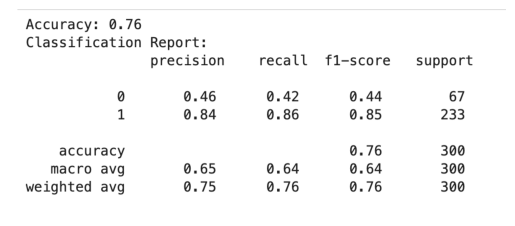

In [299]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imagen = mpimg.imread('/Users/sarasalmon/Desktop/IRONHACK/Data_Analytics/Semana_6/project/images/Captura de pantalla 2024-11-20 a las 16.40.00.png')
plt.imshow(imagen)
plt.axis('off')  
plt.show()

# Reporting

In [301]:
series_pred = pd.Series(y_pred, name='predictions')
series_y_test = pd.Series(y_test, name='real')
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)
comparison_df.head(10)

,real,predictions
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,1,1
9,0,0


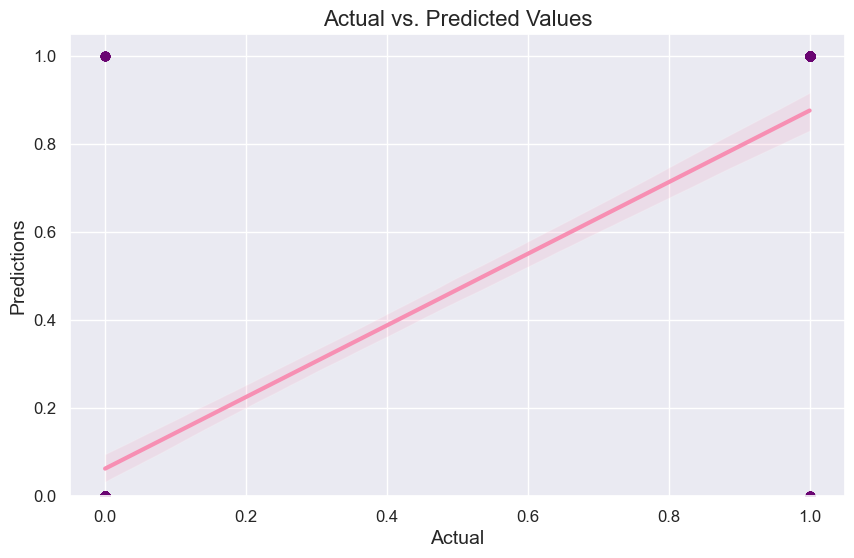

In [590]:
scatter_color = "#6A0572"
line_color = "#F78FB3"

plt.figure(figsize=(10, 6))

sns.regplot(x='real', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()